In [1]:
import os
import shutil
import utilities as rocku
import matplotlib.pyplot as plt
import tomopy
import numpy as np
import pandas as pd
import pprint
import dxchange

olefile module not found


In [2]:
# need to change
ipts="29313"

In [3]:
ct_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/ct_scans"
os.listdir(ct_loc)

['2022_10_14_high_res_0_180',
 '2022_10_14_high_res',
 '2022_10_13_set2',
 '2022_10_13_set1',
 '2022_10_12_set1']

In [4]:
ob_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/ob"
os.listdir(ob_loc)

['2022_10_14_high_res', '2022_10_13_set2', '2022_10_12']

In [6]:
dc_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/df"
os.listdir(dc_loc)

['2022_10_14_high_res', '2022_10_13_set2', '2022_10_10']

In [39]:
###################### need to change start
sample_name = "2022_10_14_high_res"
ct_dir = os.path.join(ct_loc, sample_name)
ob_dir = os.path.join(ob_loc, "2022_10_14_high_res")
dc_dir = os.path.join(dc_loc, "2022_10_14_high_res")
# ct_dir = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/raw_to_recon"
# ob_dir = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/raw_to_recon"
# dc_dir = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/raw_to_recon"
gamma_diff = 20
save_to = "/HFIR/CG1D/IPTS-"+ipts+"/shared/autoreduce/raw_to_recon/" + sample_name
ob_name = save_to + "_ob/" + 'ob_0000'
dc_name = save_to + "_dc/" + 'dc_0000'
###################### need to change end

# Find ROI and crop

In [11]:
ct_file_list = os.listdir(ct_dir)
# ct_file_list.remove('20221108_dummy_0005_000_000_0044.tiff')
fname_df = rocku.get_fname_df(ct_file_list, golden_ratio=False)
fname_df

,fname,ang_deg,ang_rad,idx
0,20221017_H1_H2_moved_0030_239_400_6195.tiff,239.40,4.178318,6195
1,20221015_H1_H2_moved_0030_034_300_0919.tiff,34.30,0.598648,919
2,20221015_H1_H2_moved_0030_116_550_3033.tiff,116.55,2.034181,3033
3,20221017_H1_H2_moved_0030_292_250_7556.tiff,292.25,5.100725,7556
4,20221015_H1_H2_moved_0030_097_650_2551.tiff,97.65,1.704314,2551
...,...,...,...,...
9256,20221016_H1_H2_moved_0030_132_300_3438.tiff,132.30,2.309071,3438
9257,20221015_H1_H2_moved_0030_111_650_2910.tiff,111.65,1.948660,2910
9258,20221016_H1_H2_moved_0030_198_800_5150.tiff,198.80,3.469715,5150
9259,20221014_H1_H2_moved_0030_011_900_0340.tiff,11.90,0.207694,340


In [12]:
fname_df.sort_values('ang_deg', inplace=True)
ang_list = fname_df['ang_deg'].to_list()
ordered_list = fname_df['fname'].to_list()
fname_df

,fname,ang_deg,ang_rad,idx
3651,20221014_H1_H2_moved_0030_000_350_0047.tiff,0.35,0.006109,47
6005,20221014_H1_H2_moved_0030_000_350_0051.tiff,0.35,0.006109,51
3037,20221014_H1_H2_moved_0030_000_350_0045.tiff,0.35,0.006109,45
5855,20221014_H1_H2_moved_0030_000_350_0048.tiff,0.35,0.006109,48
2663,20221014_H1_H2_moved_0030_000_350_0046.tiff,0.35,0.006109,46
...,...,...,...,...
6070,20221014_H1_H2_moved_0030_359_910_0041.tiff,359.91,6.281615,41
8462,20221014_H1_H2_moved_0030_359_910_0037.tiff,359.91,6.281615,37
115,20221014_H1_H2_moved_0030_359_910_0039.tiff,359.91,6.281615,39
8074,20221014_H1_H2_moved_0030_359_910_0035.tiff,359.91,6.281615,35


2it [00:01,  1.06it/s]


Projection at 0 degree:


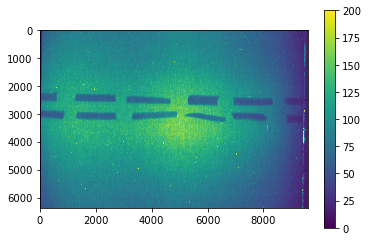

Projection at 180 degree:


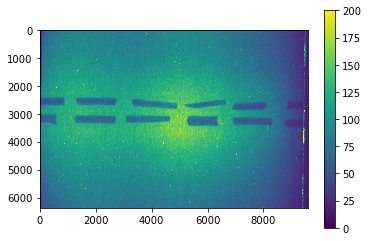

In [13]:
proj180_idx, proj180_ang = rocku.find_idx_by_ang(ang_list, 180)
proj000_idx, proj000_ang = rocku.find_idx_by_ang(ang_list, 0)
preview_image_stack = rocku.read_tiff_stack(ct_dir, [ordered_list[proj000_idx], ordered_list[proj180_idx]])
print("Projection at 0 degree:")
plt.imshow(preview_image_stack[0], vmin=0, vmax=200)
plt.colorbar()
plt.show()
print("Projection at 180 degree:")
plt.imshow(preview_image_stack[1], vmin=0, vmax=200)
plt.colorbar()
plt.show()

In [14]:
preview_image_stack.shape

(2, 6388, 9576)

Projection at 0 degree:


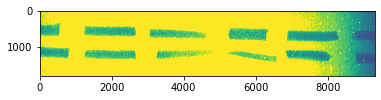

Projection at 180 degree:


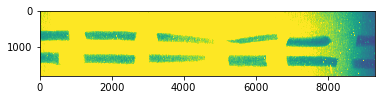

In [32]:
###################### need to change start
crop = True
crop_left = 50
crop_right = 9350
crop_top = 1900
crop_bottom = 3700
###################### need to change end
preview_image_stack_crop = rocku.crop(preview_image_stack, crop_left, crop_right, crop_top, crop_bottom, crop)
print("Projection at 0 degree:")
plt.imshow(preview_image_stack_crop[0], vmin=0, vmax=100)
plt.show()
print("Projection at 180 degree:")
plt.imshow(preview_image_stack_crop[1], vmin=0, vmax=100)
plt.show()

# Preprocess OB

Loading OB ...


27it [00:04,  6.52it/s]


(27, 6388, 9576)
Cropping ...
Removing outliers ...
Combining with median ...
(1800, 9300)
Rotating by 90 deg ...
(9300, 1800)


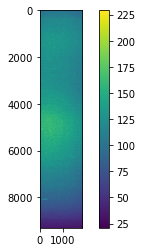

Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ob/ob_0000 ...


In [33]:
print('Loading OB ...')
ob_stack = rocku.read_tiff_stack(ob_dir, os.listdir(ob_dir))
print(ob_stack.shape)
print('Cropping ...')
ob_stack_crop = rocku.crop(ob_stack, crop_left, crop_right, crop_top, crop_bottom, crop)
print('Removing outliers ...')
ob_stack_cleaned = tomopy.remove_outlier(ob_stack_crop, gamma_diff)
print('Combining with median ...')
if ob_stack_cleaned.shape[0] == 1:
    ob_med = ob_stack_cleaned[:]
else:
    ob_med = np.median(ob_stack_cleaned, axis=0).astype(np.ushort)
print(ob_med.shape)
print('Rotating by 90 deg ...')
ob_rot = np.rot90(ob_med, k=-1)
print(ob_rot.shape)
plt.imshow(ob_rot)
plt.colorbar()
plt.show()
print('Saving {} ...'.format(ob_name))
dxchange.write_tiff(ob_rot, fname=ob_name, overwrite=True)

# Preprocess DC

Loading DC ...


27it [00:09,  2.95it/s]


(27, 6388, 9576)
Cropping ...
Removing outliers ...
Combining with median ...
(1800, 9300)
Rotating by 90 deg ...
(9300, 1800)


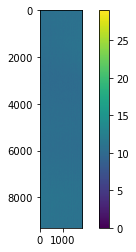

Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_dc/dc_0000 ...


In [40]:
print('Loading DC ...')
dc_stack = rocku.read_tiff_stack(dc_dir, os.listdir(dc_dir))
print(dc_stack.shape)
print('Cropping ...')
dc_stack_crop = rocku.crop(dc_stack, crop_left, crop_right, crop_top, crop_bottom, crop)
print('Removing outliers ...')
dc_stack_cleaned = tomopy.remove_outlier(dc_stack_crop, gamma_diff)
print('Combining with median ...')
if dc_stack_cleaned.shape[0] == 1:
    dc_med = dc_stack_cleaned[:]
else:
    dc_med = np.median(dc_stack_cleaned, axis=0).astype(np.ushort)
print(dc_med.shape)
print('Rotating by 90 deg ...')
dc_rot = np.rot90(dc_med, k=-1)
print(dc_rot.shape)
plt.imshow(dc_rot)
plt.colorbar()
plt.show()
print('Saving {} ...'.format(dc_name))
dxchange.write_tiff(dc_rot, fname=dc_name, overwrite=True)

# Preprocess CT scan files

In [37]:
grouped_dict = {}
for i, e_ang in enumerate(set(ang_list)):
    _fname_list = list(fname_df[fname_df['ang_deg'] == e_ang]['fname'])
    grouped_dict[_fname_list[0]] = _fname_list
pprint.pprint(grouped_dict)

{'20221014_H1_H2_moved_0030_000_350_0047.tiff': ['20221014_H1_H2_moved_0030_000_350_0047.tiff',
                                                 '20221014_H1_H2_moved_0030_000_350_0051.tiff',
                                                 '20221014_H1_H2_moved_0030_000_350_0045.tiff',
                                                 '20221014_H1_H2_moved_0030_000_350_0048.tiff',
                                                 '20221014_H1_H2_moved_0030_000_350_0046.tiff',
                                                 '20221014_H1_H2_moved_0030_000_350_0043.tiff',
                                                 '20221014_H1_H2_moved_0030_000_350_0050.tiff',
                                                 '20221014_H1_H2_moved_0030_000_350_0049.tiff',
                                                 '20221014_H1_H2_moved_0030_000_350_0044.tiff'],
 '20221014_H1_H2_moved_0030_000_700_0053.tiff': ['20221014_H1_H2_moved_0030_000_700_0053.tiff',
                                       

 '20221015_H1_H2_moved_0030_068_250_1793.tiff': ['20221015_H1_H2_moved_0030_068_250_1793.tiff',
                                                 '20221015_H1_H2_moved_0030_068_250_1792.tiff',
                                                 '20221015_H1_H2_moved_0030_068_250_1797.tiff',
                                                 '20221015_H1_H2_moved_0030_068_250_1794.tiff',
                                                 '20221015_H1_H2_moved_0030_068_250_1796.tiff',
                                                 '20221015_H1_H2_moved_0030_068_250_1790.tiff',
                                                 '20221015_H1_H2_moved_0030_068_250_1789.tiff',
                                                 '20221015_H1_H2_moved_0030_068_250_1791.tiff',
                                                 '20221015_H1_H2_moved_0030_068_250_1795.tiff'],
 '20221015_H1_H2_moved_0030_068_600_1803.tiff': ['20221015_H1_H2_moved_0030_068_600_1803.tiff',
                                       

                                                 '20221016_H1_H2_moved_0030_130_550_3393.tiff',
                                                 '20221016_H1_H2_moved_0030_130_550_3396.tiff',
                                                 '20221016_H1_H2_moved_0030_130_550_3398.tiff',
                                                 '20221016_H1_H2_moved_0030_130_550_3395.tiff',
                                                 '20221016_H1_H2_moved_0030_130_550_3391.tiff',
                                                 '20221016_H1_H2_moved_0030_130_550_3392.tiff',
                                                 '20221016_H1_H2_moved_0030_130_550_3399.tiff',
                                                 '20221016_H1_H2_moved_0030_130_550_3394.tiff'],
 '20221016_H1_H2_moved_0030_130_900_3400.tiff': ['20221016_H1_H2_moved_0030_130_900_3400.tiff',
                                                 '20221016_H1_H2_moved_0030_130_900_3402.tiff',
                                       

 '20221016_H1_H2_moved_0030_206_850_5359.tiff': ['20221016_H1_H2_moved_0030_206_850_5359.tiff',
                                                 '20221016_H1_H2_moved_0030_206_850_5357.tiff',
                                                 '20221016_H1_H2_moved_0030_206_850_5354.tiff',
                                                 '20221016_H1_H2_moved_0030_206_850_5361.tiff',
                                                 '20221016_H1_H2_moved_0030_206_850_5353.tiff',
                                                 '20221016_H1_H2_moved_0030_206_850_5360.tiff',
                                                 '20221016_H1_H2_moved_0030_206_850_5356.tiff',
                                                 '20221016_H1_H2_moved_0030_206_850_5355.tiff',
                                                 '20221016_H1_H2_moved_0030_206_850_5358.tiff'],
 '20221016_H1_H2_moved_0030_207_200_5362.tiff': ['20221016_H1_H2_moved_0030_207_200_5362.tiff',
                                       

 '20221017_H1_H2_moved_0030_269_850_6973.tiff': ['20221017_H1_H2_moved_0030_269_850_6973.tiff',
                                                 '20221017_H1_H2_moved_0030_269_850_6981.tiff',
                                                 '20221017_H1_H2_moved_0030_269_850_6980.tiff',
                                                 '20221017_H1_H2_moved_0030_269_850_6976.tiff',
                                                 '20221017_H1_H2_moved_0030_269_850_6977.tiff',
                                                 '20221017_H1_H2_moved_0030_269_850_6975.tiff',
                                                 '20221017_H1_H2_moved_0030_269_850_6978.tiff',
                                                 '20221017_H1_H2_moved_0030_269_850_6974.tiff',
                                                 '20221017_H1_H2_moved_0030_269_850_6979.tiff'],
 '20221017_H1_H2_moved_0030_270_200_6984.tiff': ['20221017_H1_H2_moved_0030_270_200_6984.tiff',
                                       

                                                 '20221017_H1_H2_moved_0030_336_000_8680.tiff',
                                                 '20221017_H1_H2_moved_0030_336_000_8678.tiff',
                                                 '20221017_H1_H2_moved_0030_336_000_8681.tiff',
                                                 '20221017_H1_H2_moved_0030_336_000_8675.tiff',
                                                 '20221017_H1_H2_moved_0030_336_000_8679.tiff'],
 '20221018_H1_H2_moved_0030_336_350_8686.tiff': ['20221018_H1_H2_moved_0030_336_350_8686.tiff',
                                                 '20221018_H1_H2_moved_0030_336_350_8688.tiff',
                                                 '20221018_H1_H2_moved_0030_336_350_8687.tiff',
                                                 '20221018_H1_H2_moved_0030_336_350_8690.tiff',
                                                 '20221018_H1_H2_moved_0030_336_350_8684.tiff',
                                       

In [38]:
# for e_group in ['20221108_Image_180_000_0030_0063.tiff']:
for e_group in grouped_dict.keys():
    _fname_list = grouped_dict[e_group]
    print('##################################')
    print('Processing group start with {} ...'.format(e_group))
    print('Loading ...')
    _image_stack = rocku.read_tiff_stack(ct_dir, _fname_list)
    print('Cropping ...')
    _image_stack_crop = rocku.crop(_image_stack, crop_left, crop_right, crop_top, crop_bottom, crop)
    print('Removing outliers ...')
    _image_stack_cleaned = tomopy.remove_outlier(_image_stack_crop, gamma_diff)
    print('Combining with median ...')
    _image_med = np.median(_image_stack_cleaned, axis=0).astype(np.ushort)
    print('Rotating by 90 deg ...')
    _image_rot = np.rot90(_image_med, k=-1)
    fname_raw = save_to + "_ct/" + e_group
    print('Saving {} ...'.format(fname_raw))
    dxchange.write_tiff(_image_rot, fname=fname_raw, overwrite=True)
    _image_norm, _ob, _dc = rocku.normalize(_image_rot, ob_rot, dc_rot)
    fname_norm = save_to + "_norm/" + e_group
    print('Saving {} ...'.format(fname_norm))
    dxchange.write_tiff(_image_norm, fname=fname_norm, overwrite=True)

##################################
Processing group start with 20221014_H1_H2_moved_0030_001_750_0084.tiff ...
Loading ...


9it [00:02,  3.37it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_001_750_0084.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_001_750_0084.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_002_450_0098.tiff ...
Loading ...


9it [00:02,  3.43it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_002_450_0098.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_002_450_0098.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_002_800_0108.tiff ...
Loading ...


9it [00:02,  3.36it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_002_800_0108.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_002_800_0108.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_003_500_0131.tiff ...
Loading ...


9it [00:02,  4.14it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_003_500_0131.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_003_500_0131.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_004_200_0145.tiff ...
Loading ...


9it [00:02,  3.49it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_004_200_0145.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_004_200_0145.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_004_550_0154.tiff ...
Loading ...


9it [00:03,  2.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_004_550_0154.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_004_550_0154.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_004_900_0160.tiff ...
Loading ...


9it [00:02,  3.89it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_004_900_0160.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_004_900_0160.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_005_250_0171.tiff ...
Loading ...


9it [00:02,  4.04it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_005_250_0171.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_005_250_0171.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_006_300_0197.tiff ...
Loading ...


9it [00:03,  2.78it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_006_300_0197.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_006_300_0197.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_007_000_0217.tiff ...
Loading ...


9it [00:02,  3.75it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_007_000_0217.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_007_000_0217.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_008_050_0241.tiff ...
Loading ...


9it [00:02,  3.53it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_008_050_0241.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_008_050_0241.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_009_100_0272.tiff ...
Loading ...


9it [00:03,  2.88it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_009_100_0272.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_009_100_0272.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_010_150_0295.tiff ...
Loading ...


9it [00:02,  3.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_010_150_0295.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_010_150_0295.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_011_200_0327.tiff ...
Loading ...


9it [00:02,  3.08it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_011_200_0327.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_011_200_0327.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_012_250_0354.tiff ...
Loading ...


9it [00:02,  3.75it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_012_250_0354.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_012_250_0354.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_013_300_0378.tiff ...
Loading ...


9it [00:02,  3.69it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_013_300_0378.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_013_300_0378.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_014_000_0400.tiff ...
Loading ...


9it [00:02,  3.53it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_014_000_0400.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_014_000_0400.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_015_050_0429.tiff ...
Loading ...


9it [00:02,  3.59it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_015_050_0429.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_015_050_0429.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_016_100_0448.tiff ...
Loading ...


9it [00:02,  3.02it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_016_100_0448.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_016_100_0448.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_018_200_0509.tiff ...
Loading ...


9it [00:02,  3.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_018_200_0509.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_018_200_0509.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_019_250_0537.tiff ...
Loading ...


9it [00:02,  3.49it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_019_250_0537.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_019_250_0537.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_020_300_0556.tiff ...
Loading ...


9it [00:02,  3.46it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_020_300_0556.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_020_300_0556.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_021_000_0580.tiff ...
Loading ...


9it [00:03,  2.96it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_021_000_0580.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_021_000_0580.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_023_100_0636.tiff ...
Loading ...


9it [00:03,  2.84it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_023_100_0636.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_023_100_0636.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_024_150_0657.tiff ...
Loading ...


9it [00:02,  3.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_024_150_0657.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_024_150_0657.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_025_200_0683.tiff ...
Loading ...


9it [00:03,  2.87it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_025_200_0683.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_025_200_0683.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_026_250_0712.tiff ...
Loading ...


9it [00:02,  3.03it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_026_250_0712.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_026_250_0712.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_025_900_0705.tiff ...
Loading ...


9it [00:02,  3.54it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_025_900_0705.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_025_900_0705.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_026_950_0729.tiff ...
Loading ...


9it [00:02,  3.81it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_026_950_0729.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_026_950_0729.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_026_600_0719.tiff ...
Loading ...


9it [00:03,  2.55it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_026_600_0719.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_026_600_0719.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_027_300_0743.tiff ...
Loading ...


9it [00:03,  2.54it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_027_300_0743.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_027_300_0743.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_028_000_0761.tiff ...
Loading ...


9it [00:02,  3.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_028_000_0761.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_028_000_0761.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_029_050_0789.tiff ...
Loading ...


9it [00:02,  3.37it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_029_050_0789.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_029_050_0789.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_030_100_0810.tiff ...
Loading ...


9it [00:02,  3.51it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_030_100_0810.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_030_100_0810.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_031_150_0839.tiff ...
Loading ...


9it [00:02,  3.72it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_031_150_0839.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_031_150_0839.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_033_250_0890.tiff ...
Loading ...


9it [00:03,  2.94it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_033_250_0890.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_033_250_0890.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_034_300_0918.tiff ...
Loading ...


9it [00:03,  2.56it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_034_300_0918.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_034_300_0918.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_035_000_0936.tiff ...
Loading ...


9it [00:02,  3.15it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_035_000_0936.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_035_000_0936.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_036_050_0966.tiff ...
Loading ...


9it [00:03,  2.62it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_036_050_0966.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_036_050_0966.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_037_100_0991.tiff ...
Loading ...


9it [00:02,  3.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_037_100_0991.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_037_100_0991.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_008_750_0262.tiff ...
Loading ...


9it [00:02,  3.14it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_008_750_0262.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_008_750_0262.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_038_150_1022.tiff ...
Loading ...


9it [00:02,  3.44it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_038_150_1022.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_038_150_1022.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_039_200_1043.tiff ...
Loading ...


9it [00:03,  2.71it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_039_200_1043.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_039_200_1043.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_040_250_1073.tiff ...
Loading ...


9it [00:02,  3.24it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_040_250_1073.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_040_250_1073.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_041_300_1103.tiff ...
Loading ...


9it [00:03,  2.92it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_041_300_1103.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_041_300_1103.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_043_050_1142.tiff ...
Loading ...


9it [00:03,  2.44it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_043_050_1142.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_043_050_1142.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_044_100_1176.tiff ...
Loading ...


9it [00:03,  2.54it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_044_100_1176.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_044_100_1176.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_045_150_1199.tiff ...
Loading ...


9it [00:04,  2.12it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_045_150_1199.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_045_150_1199.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_046_200_1229.tiff ...
Loading ...


9it [00:03,  2.63it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_046_200_1229.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_046_200_1229.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_047_250_1256.tiff ...
Loading ...


9it [00:03,  2.55it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_047_250_1256.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_047_250_1256.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_010_500_0305.tiff ...
Loading ...


9it [00:03,  2.72it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_010_500_0305.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_010_500_0305.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_048_300_1276.tiff ...
Loading ...


9it [00:03,  2.29it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_048_300_1276.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_048_300_1276.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_049_000_1299.tiff ...
Loading ...


9it [00:03,  2.72it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_049_000_1299.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_049_000_1299.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_050_050_1329.tiff ...
Loading ...


9it [00:03,  2.96it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_050_050_1329.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_050_050_1329.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_051_100_1348.tiff ...
Loading ...


9it [00:03,  2.80it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_051_100_1348.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_051_100_1348.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_052_150_1376.tiff ...
Loading ...


9it [00:03,  2.70it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_052_150_1376.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_052_150_1376.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_053_200_1408.tiff ...
Loading ...


9it [00:03,  2.84it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_053_200_1408.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_053_200_1408.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_054_250_1431.tiff ...
Loading ...


9it [00:03,  2.89it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_054_250_1431.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_054_250_1431.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_055_300_1458.tiff ...
Loading ...


9it [00:03,  2.60it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_055_300_1458.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_055_300_1458.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_056_000_1480.tiff ...
Loading ...


9it [00:02,  3.04it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_056_000_1480.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_056_000_1480.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_057_050_1507.tiff ...
Loading ...


9it [00:03,  2.28it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_057_050_1507.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_057_050_1507.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_058_100_1536.tiff ...
Loading ...


9it [00:02,  3.16it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_058_100_1536.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_058_100_1536.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_059_150_1555.tiff ...
Loading ...


9it [00:03,  2.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_059_150_1555.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_059_150_1555.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_060_200_1586.tiff ...
Loading ...


9it [00:03,  2.55it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_060_200_1586.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_060_200_1586.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_061_250_1615.tiff ...
Loading ...


9it [00:03,  2.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_061_250_1615.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_061_250_1615.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_062_300_1641.tiff ...
Loading ...


9it [00:03,  2.63it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_062_300_1641.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_062_300_1641.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_063_000_1654.tiff ...
Loading ...


9it [00:02,  3.23it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_063_000_1654.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_063_000_1654.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_064_050_1686.tiff ...
Loading ...


9it [00:02,  3.16it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_064_050_1686.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_064_050_1686.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_065_100_1711.tiff ...
Loading ...


9it [00:02,  3.36it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_065_100_1711.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_065_100_1711.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_066_150_1738.tiff ...
Loading ...


9it [00:02,  3.18it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_066_150_1738.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_066_150_1738.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_068_250_1793.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_068_250_1793.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_068_250_1793.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_069_300_1824.tiff ...
Loading ...


9it [00:02,  3.08it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_069_300_1824.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_069_300_1824.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_070_000_1841.tiff ...
Loading ...


9it [00:03,  2.64it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_070_000_1841.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_070_000_1841.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_071_050_1866.tiff ...
Loading ...


9it [00:03,  2.43it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_071_050_1866.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_071_050_1866.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_072_100_1894.tiff ...
Loading ...


9it [00:03,  2.68it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_072_100_1894.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_072_100_1894.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_015_750_0441.tiff ...
Loading ...


9it [00:03,  2.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_015_750_0441.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_015_750_0441.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_073_150_1917.tiff ...
Loading ...


9it [00:03,  2.96it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_073_150_1917.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_073_150_1917.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_074_200_1943.tiff ...
Loading ...


9it [00:03,  2.79it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_074_200_1943.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_074_200_1943.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_075_250_1973.tiff ...
Loading ...


9it [00:02,  3.20it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_075_250_1973.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_075_250_1973.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_076_300_1997.tiff ...
Loading ...


9it [00:03,  2.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_076_300_1997.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_076_300_1997.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_080_150_2100.tiff ...
Loading ...


9it [00:03,  2.41it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_080_150_2100.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_080_150_2100.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_081_200_2130.tiff ...
Loading ...


9it [00:02,  3.15it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_081_200_2130.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_081_200_2130.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_083_300_2177.tiff ...
Loading ...


9it [00:03,  2.66it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_083_300_2177.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_083_300_2177.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_084_000_2197.tiff ...
Loading ...


9it [00:03,  2.95it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_084_000_2197.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_084_000_2197.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_085_050_2226.tiff ...
Loading ...


9it [00:03,  2.96it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_085_050_2226.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_085_050_2226.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_017_500_0484.tiff ...
Loading ...


9it [00:03,  2.61it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_017_500_0484.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_017_500_0484.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_086_100_2248.tiff ...
Loading ...


9it [00:03,  2.74it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_086_100_2248.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_086_100_2248.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_088_200_2303.tiff ...
Loading ...


9it [00:02,  3.08it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_088_200_2303.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_088_200_2303.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_089_250_2329.tiff ...
Loading ...


9it [00:03,  2.71it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_089_250_2329.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_089_250_2329.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_090_300_2364.tiff ...
Loading ...


9it [00:03,  2.95it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_090_300_2364.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_090_300_2364.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_091_000_2375.tiff ...
Loading ...


9it [00:03,  2.97it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_091_000_2375.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_091_000_2375.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_083_650_2191.tiff ...
Loading ...


9it [00:03,  2.66it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_083_650_2191.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_083_650_2191.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_093_100_2430.tiff ...
Loading ...


9it [00:03,  2.63it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_093_100_2430.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_093_100_2430.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_094_150_2455.tiff ...
Loading ...


9it [00:02,  3.74it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_094_150_2455.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_094_150_2455.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_095_200_2484.tiff ...
Loading ...


9it [00:02,  3.67it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_095_200_2484.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_095_200_2484.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_096_250_2511.tiff ...
Loading ...


9it [00:02,  3.07it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_096_250_2511.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_096_250_2511.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_088_550_2319.tiff ...
Loading ...


9it [00:02,  3.28it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_088_550_2319.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_088_550_2319.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_098_000_2557.tiff ...
Loading ...


9it [00:03,  2.98it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_098_000_2557.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_098_000_2557.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_099_050_2588.tiff ...
Loading ...


9it [00:03,  2.61it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_099_050_2588.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_099_050_2588.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_100_100_2609.tiff ...
Loading ...


9it [00:03,  2.95it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_100_100_2609.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_100_100_2609.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_101_150_2636.tiff ...
Loading ...


9it [00:02,  3.58it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_101_150_2636.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_101_150_2636.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_102_550_2678.tiff ...
Loading ...


9it [00:03,  2.59it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_102_550_2678.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_102_550_2678.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_101_850_2656.tiff ...
Loading ...


9it [00:03,  2.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_101_850_2656.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_101_850_2656.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_104_300_2724.tiff ...
Loading ...


9it [00:03,  2.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_104_300_2724.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_104_300_2724.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_105_000_2740.tiff ...
Loading ...


9it [00:03,  2.50it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_105_000_2740.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_105_000_2740.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_106_050_2765.tiff ...
Loading ...


9it [00:03,  2.63it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_106_050_2765.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_106_050_2765.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_106_750_2782.tiff ...
Loading ...


9it [00:02,  3.01it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_106_750_2782.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_106_750_2782.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_103_250_2691.tiff ...
Loading ...


9it [00:03,  2.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_103_250_2691.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_103_250_2691.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_103_600_2701.tiff ...
Loading ...


9it [00:03,  2.91it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_103_600_2701.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_103_600_2701.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_105_350_2748.tiff ...
Loading ...


9it [00:02,  3.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_105_350_2748.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_105_350_2748.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_022_750_0625.tiff ...
Loading ...


9it [00:02,  3.57it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_022_750_0625.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_022_750_0625.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_107_100_2793.tiff ...
Loading ...


9it [00:02,  3.24it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_107_100_2793.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_107_100_2793.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_104_650_2730.tiff ...
Loading ...


9it [00:03,  2.57it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_104_650_2730.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_104_650_2730.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_107_450_2802.tiff ...
Loading ...


9it [00:03,  2.54it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_107_450_2802.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_107_450_2802.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_106_400_2777.tiff ...
Loading ...


9it [00:02,  3.02it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_106_400_2777.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_106_400_2777.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_107_800_2808.tiff ...
Loading ...


9it [00:02,  3.25it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_107_800_2808.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_107_800_2808.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_108_150_2817.tiff ...
Loading ...


9it [00:03,  2.78it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_108_150_2817.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_108_150_2817.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_109_200_2846.tiff ...
Loading ...


9it [00:03,  2.96it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_109_200_2846.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_109_200_2846.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_110_250_2870.tiff ...
Loading ...


9it [00:03,  2.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_110_250_2870.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_110_250_2870.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_111_300_2899.tiff ...
Loading ...


9it [00:02,  3.45it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_111_300_2899.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_111_300_2899.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_024_500_0670.tiff ...
Loading ...


9it [00:02,  3.24it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_024_500_0670.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_024_500_0670.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_113_050_2947.tiff ...
Loading ...


9it [00:02,  3.49it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_113_050_2947.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_113_050_2947.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_114_100_2968.tiff ...
Loading ...


9it [00:02,  3.45it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_114_100_2968.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_114_100_2968.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_115_150_2995.tiff ...
Loading ...


9it [00:03,  2.95it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_115_150_2995.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_115_150_2995.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_116_200_3028.tiff ...
Loading ...


9it [00:03,  2.90it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_116_200_3028.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_116_200_3028.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_117_250_3056.tiff ...
Loading ...


9it [00:03,  2.87it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_117_250_3056.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_117_250_3056.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_118_300_3081.tiff ...
Loading ...


9it [00:03,  2.93it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_118_300_3081.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_118_300_3081.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_119_000_3097.tiff ...
Loading ...


9it [00:03,  2.77it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_119_000_3097.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_119_000_3097.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_120_050_3123.tiff ...
Loading ...


9it [00:02,  3.57it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_120_050_3123.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_120_050_3123.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_121_100_3148.tiff ...
Loading ...


9it [00:02,  4.03it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_121_100_3148.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_121_100_3148.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_122_150_3178.tiff ...
Loading ...


9it [00:03,  2.77it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_122_150_3178.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_122_150_3178.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_123_200_3207.tiff ...
Loading ...


9it [00:02,  3.26it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_123_200_3207.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_123_200_3207.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_124_250_3237.tiff ...
Loading ...


9it [00:02,  3.64it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_124_250_3237.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_124_250_3237.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_125_300_3264.tiff ...
Loading ...


9it [00:03,  2.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_125_300_3264.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_125_300_3264.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_126_000_3274.tiff ...
Loading ...


9it [00:03,  2.75it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_126_000_3274.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_126_000_3274.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_127_050_3306.tiff ...
Loading ...


9it [00:02,  3.89it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_127_050_3306.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_127_050_3306.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_128_100_3336.tiff ...
Loading ...


9it [00:02,  3.44it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_128_100_3336.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_128_100_3336.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_129_150_3361.tiff ...
Loading ...


9it [00:02,  3.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_129_150_3361.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_129_150_3361.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_130_200_3383.tiff ...
Loading ...


9it [00:03,  2.61it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_130_200_3383.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_130_200_3383.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_131_250_3410.tiff ...
Loading ...


9it [00:03,  2.91it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_131_250_3410.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_131_250_3410.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_132_300_3438.tiff ...
Loading ...


9it [00:02,  3.69it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_132_300_3438.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_132_300_3438.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_133_000_3455.tiff ...
Loading ...


9it [00:02,  3.20it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_133_000_3455.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_133_000_3455.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_134_050_3484.tiff ...
Loading ...


9it [00:02,  3.09it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_134_050_3484.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_134_050_3484.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_135_100_3516.tiff ...
Loading ...


9it [00:02,  3.08it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_135_100_3516.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_135_100_3516.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_136_150_3535.tiff ...
Loading ...


9it [00:03,  2.85it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_136_150_3535.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_136_150_3535.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_029_750_0805.tiff ...
Loading ...


9it [00:03,  2.79it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_029_750_0805.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_029_750_0805.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_138_250_3591.tiff ...
Loading ...


9it [00:03,  2.49it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_138_250_3591.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_138_250_3591.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_139_300_3622.tiff ...
Loading ...


9it [00:02,  3.38it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_139_300_3622.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_139_300_3622.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_140_000_3640.tiff ...
Loading ...


9it [00:02,  3.27it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_140_000_3640.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_140_000_3640.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_141_050_3664.tiff ...
Loading ...


9it [00:02,  3.24it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_141_050_3664.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_141_050_3664.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_142_100_3694.tiff ...
Loading ...


9it [00:02,  3.07it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_142_100_3694.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_142_100_3694.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_143_150_3723.tiff ...
Loading ...


9it [00:02,  3.46it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_143_150_3723.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_143_150_3723.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_144_200_3746.tiff ...
Loading ...


9it [00:03,  2.82it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_144_200_3746.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_144_200_3746.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_145_250_3771.tiff ...
Loading ...


9it [00:02,  4.00it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_145_250_3771.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_145_250_3771.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_146_300_3796.tiff ...
Loading ...


9it [00:02,  3.58it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_146_300_3796.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_146_300_3796.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_031_500_0847.tiff ...
Loading ...


9it [00:03,  2.89it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_031_500_0847.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_031_500_0847.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_148_050_3842.tiff ...
Loading ...


9it [00:02,  3.51it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_148_050_3842.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_148_050_3842.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_149_100_3876.tiff ...
Loading ...


9it [00:02,  3.11it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_149_100_3876.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_149_100_3876.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_150_150_3896.tiff ...
Loading ...


9it [00:02,  3.43it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_150_150_3896.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_150_150_3896.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_151_200_3928.tiff ...
Loading ...


9it [00:02,  3.58it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_151_200_3928.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_151_200_3928.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_152_250_3957.tiff ...
Loading ...


9it [00:02,  3.17it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_152_250_3957.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_152_250_3957.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_153_300_3980.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_153_300_3980.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_153_300_3980.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_154_000_3999.tiff ...
Loading ...


9it [00:02,  3.57it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_154_000_3999.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_154_000_3999.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_155_050_4022.tiff ...
Loading ...


9it [00:02,  3.57it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_155_050_4022.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_155_050_4022.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_156_100_4050.tiff ...
Loading ...


9it [00:02,  3.70it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_156_100_4050.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_156_100_4050.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_157_150_4077.tiff ...
Loading ...


9it [00:02,  3.86it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_157_150_4077.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_157_150_4077.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_158_200_4102.tiff ...
Loading ...


9it [00:02,  3.51it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_158_200_4102.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_158_200_4102.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_159_250_4136.tiff ...
Loading ...


9it [00:02,  3.84it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_159_250_4136.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_159_250_4136.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_160_300_4157.tiff ...
Loading ...


9it [00:03,  2.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_160_300_4157.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_160_300_4157.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_161_000_4177.tiff ...
Loading ...


9it [00:03,  2.97it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_161_000_4177.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_161_000_4177.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_162_050_4202.tiff ...
Loading ...


9it [00:02,  3.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_162_050_4202.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_162_050_4202.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_163_100_4229.tiff ...
Loading ...


9it [00:03,  2.97it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_163_100_4229.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_163_100_4229.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_164_150_4262.tiff ...
Loading ...


9it [00:02,  3.12it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_164_150_4262.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_164_150_4262.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_165_200_4282.tiff ...
Loading ...


9it [00:02,  3.10it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_165_200_4282.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_165_200_4282.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_166_250_4315.tiff ...
Loading ...


9it [00:03,  2.71it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_166_250_4315.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_166_250_4315.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_167_300_4341.tiff ...
Loading ...


9it [00:03,  2.91it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_167_300_4341.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_167_300_4341.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_168_000_4354.tiff ...
Loading ...


9it [00:02,  3.38it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_168_000_4354.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_168_000_4354.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_169_050_4383.tiff ...
Loading ...


9it [00:02,  3.11it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_169_050_4383.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_169_050_4383.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_170_100_4409.tiff ...
Loading ...


9it [00:03,  2.70it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_170_100_4409.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_170_100_4409.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_171_150_4435.tiff ...
Loading ...


9it [00:03,  2.80it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_171_150_4435.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_171_150_4435.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_172_200_4462.tiff ...
Loading ...


9it [00:02,  3.08it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_172_200_4462.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_172_200_4462.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_036_750_0984.tiff ...
Loading ...


9it [00:02,  3.84it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_036_750_0984.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_036_750_0984.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_174_300_4517.tiff ...
Loading ...


9it [00:02,  3.71it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_174_300_4517.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_174_300_4517.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_175_000_4542.tiff ...
Loading ...


9it [00:03,  2.82it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_175_000_4542.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_175_000_4542.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_176_050_4566.tiff ...
Loading ...


9it [00:02,  3.45it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_176_050_4566.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_176_050_4566.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_177_100_4596.tiff ...
Loading ...


9it [00:02,  3.71it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_177_100_4596.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_177_100_4596.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_178_150_4621.tiff ...
Loading ...


9it [00:02,  3.28it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_178_150_4621.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_178_150_4621.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_179_200_4643.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_179_200_4643.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_179_200_4643.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_180_250_4669.tiff ...
Loading ...


9it [00:02,  3.64it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_180_250_4669.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_180_250_4669.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_181_300_4696.tiff ...
Loading ...


9it [00:02,  3.64it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_181_300_4696.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_181_300_4696.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_182_000_4719.tiff ...
Loading ...


9it [00:02,  3.44it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_182_000_4719.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_182_000_4719.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_038_500_1032.tiff ...
Loading ...


9it [00:02,  3.01it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_038_500_1032.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_038_500_1032.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_184_100_4769.tiff ...
Loading ...


9it [00:02,  3.36it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_184_100_4769.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_184_100_4769.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_185_150_4795.tiff ...
Loading ...


9it [00:02,  4.09it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_185_150_4795.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_185_150_4795.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_186_200_4830.tiff ...
Loading ...


9it [00:02,  3.35it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_186_200_4830.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_186_200_4830.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_187_250_4854.tiff ...
Loading ...


9it [00:02,  3.79it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_187_250_4854.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_187_250_4854.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_188_300_4882.tiff ...
Loading ...


9it [00:03,  2.75it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_188_300_4882.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_188_300_4882.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_189_000_4894.tiff ...
Loading ...


9it [00:02,  3.10it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_189_000_4894.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_189_000_4894.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_190_050_4925.tiff ...
Loading ...


9it [00:02,  3.54it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_190_050_4925.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_190_050_4925.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_191_100_4952.tiff ...
Loading ...


9it [00:03,  2.95it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_191_100_4952.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_191_100_4952.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_192_150_4982.tiff ...
Loading ...


9it [00:03,  2.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_192_150_4982.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_192_150_4982.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_193_200_5003.tiff ...
Loading ...


9it [00:02,  3.46it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_193_200_5003.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_193_200_5003.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_194_250_5030.tiff ...
Loading ...


9it [00:02,  4.28it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_194_250_5030.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_194_250_5030.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_195_300_5058.tiff ...
Loading ...


9it [00:03,  2.83it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_195_300_5058.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_195_300_5058.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_196_000_5079.tiff ...
Loading ...


9it [00:02,  3.77it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_196_000_5079.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_196_000_5079.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_197_050_5106.tiff ...
Loading ...


9it [00:02,  3.44it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_197_050_5106.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_197_050_5106.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_198_100_5130.tiff ...
Loading ...


9it [00:02,  4.28it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_198_100_5130.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_198_100_5130.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_199_150_5157.tiff ...
Loading ...


9it [00:02,  3.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_199_150_5157.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_199_150_5157.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_200_200_5189.tiff ...
Loading ...


9it [00:02,  3.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_200_200_5189.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_200_200_5189.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_201_250_5217.tiff ...
Loading ...


9it [00:02,  3.74it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_201_250_5217.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_201_250_5217.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_202_300_5244.tiff ...
Loading ...


9it [00:02,  4.24it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_202_300_5244.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_202_300_5244.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_042_000_1115.tiff ...
Loading ...


9it [00:02,  3.35it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_042_000_1115.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_042_000_1115.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_204_050_5283.tiff ...
Loading ...


9it [00:02,  3.31it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_204_050_5283.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_204_050_5283.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_205_100_5308.tiff ...
Loading ...


9it [00:02,  3.28it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_205_100_5308.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_205_100_5308.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_206_150_5339.tiff ...
Loading ...


9it [00:03,  2.67it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_206_150_5339.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_206_150_5339.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_207_200_5362.tiff ...
Loading ...


9it [00:02,  3.28it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_207_200_5362.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_207_200_5362.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_043_750_1165.tiff ...
Loading ...


9it [00:03,  2.73it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_043_750_1165.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_043_750_1165.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_209_300_5422.tiff ...
Loading ...


9it [00:02,  3.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_209_300_5422.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_209_300_5422.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_210_000_5439.tiff ...
Loading ...


9it [00:03,  2.92it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_210_000_5439.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_210_000_5439.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_211_050_5468.tiff ...
Loading ...


9it [00:02,  4.12it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_211_050_5468.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_211_050_5468.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_212_100_5491.tiff ...
Loading ...


9it [00:02,  4.00it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_212_100_5491.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_212_100_5491.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_213_150_5517.tiff ...
Loading ...


9it [00:02,  3.43it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_213_150_5517.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_213_150_5517.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_214_200_5546.tiff ...
Loading ...


9it [00:03,  2.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_214_200_5546.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_214_200_5546.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_215_250_5575.tiff ...
Loading ...


9it [00:02,  3.82it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_215_250_5575.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_215_250_5575.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_216_300_5597.tiff ...
Loading ...


9it [00:02,  3.68it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_216_300_5597.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_216_300_5597.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_217_000_5621.tiff ...
Loading ...


9it [00:02,  3.85it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_217_000_5621.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_217_000_5621.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_045_500_1206.tiff ...
Loading ...


9it [00:02,  3.72it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_045_500_1206.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_045_500_1206.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_219_100_5675.tiff ...
Loading ...


9it [00:03,  2.97it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_219_100_5675.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_219_100_5675.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_220_150_5700.tiff ...
Loading ...


9it [00:03,  2.81it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_220_150_5700.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_220_150_5700.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_221_200_5727.tiff ...
Loading ...


9it [00:02,  3.74it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_221_200_5727.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_221_200_5727.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_222_250_5753.tiff ...
Loading ...


9it [00:02,  3.94it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_222_250_5753.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_222_250_5753.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_223_300_5783.tiff ...
Loading ...


9it [00:02,  4.05it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_223_300_5783.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_223_300_5783.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_224_000_5794.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_224_000_5794.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_224_000_5794.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_225_050_5829.tiff ...
Loading ...


9it [00:02,  3.50it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_225_050_5829.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_225_050_5829.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_226_100_5849.tiff ...
Loading ...


9it [00:02,  3.47it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_226_100_5849.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_226_100_5849.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_227_150_5879.tiff ...
Loading ...


9it [00:02,  3.97it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_227_150_5879.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_227_150_5879.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_228_200_5902.tiff ...
Loading ...


9it [00:02,  4.04it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_228_200_5902.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_228_200_5902.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_229_250_5935.tiff ...
Loading ...


9it [00:02,  4.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_229_250_5935.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_229_250_5935.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_230_300_5960.tiff ...
Loading ...


9it [00:02,  3.18it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_230_300_5960.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_230_300_5960.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_231_000_5978.tiff ...
Loading ...


9it [00:02,  3.58it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_231_000_5978.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_231_000_5978.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_232_050_6005.tiff ...
Loading ...


9it [00:02,  3.85it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_232_050_6005.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_232_050_6005.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_233_100_6033.tiff ...
Loading ...


9it [00:02,  3.37it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_233_100_6033.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_233_100_6033.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_234_150_6059.tiff ...
Loading ...


9it [00:02,  3.74it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_234_150_6059.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_234_150_6059.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_235_200_6085.tiff ...
Loading ...


9it [00:02,  3.68it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_235_200_6085.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_235_200_6085.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_236_250_6111.tiff ...
Loading ...


9it [00:02,  3.09it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_236_250_6111.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_236_250_6111.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_237_300_6137.tiff ...
Loading ...


9it [00:02,  3.80it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_237_300_6137.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_237_300_6137.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_238_000_6157.tiff ...
Loading ...


9it [00:02,  3.69it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_238_000_6157.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_238_000_6157.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_239_050_6184.tiff ...
Loading ...


9it [00:02,  3.89it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_239_050_6184.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_239_050_6184.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_240_100_6216.tiff ...
Loading ...


9it [00:02,  4.04it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_240_100_6216.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_240_100_6216.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_241_150_6242.tiff ...
Loading ...


9it [00:02,  4.23it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_241_150_6242.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_241_150_6242.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_242_200_6270.tiff ...
Loading ...


9it [00:02,  3.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_242_200_6270.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_242_200_6270.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_050_750_1347.tiff ...
Loading ...


9it [00:03,  2.71it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_050_750_1347.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_050_750_1347.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_244_300_6322.tiff ...
Loading ...


9it [00:02,  4.22it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_244_300_6322.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_244_300_6322.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_245_000_6334.tiff ...
Loading ...


9it [00:02,  3.27it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_245_000_6334.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_245_000_6334.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_246_050_6369.tiff ...
Loading ...


9it [00:02,  3.80it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_246_050_6369.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_246_050_6369.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_247_100_6392.tiff ...
Loading ...


9it [00:02,  3.94it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_247_100_6392.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_247_100_6392.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_248_150_6415.tiff ...
Loading ...


9it [00:03,  2.96it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_248_150_6415.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_248_150_6415.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_249_200_6450.tiff ...
Loading ...


9it [00:02,  3.44it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_249_200_6450.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_249_200_6450.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_250_250_6476.tiff ...
Loading ...


9it [00:02,  3.16it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_250_250_6476.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_250_250_6476.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_251_300_6504.tiff ...
Loading ...


9it [00:02,  3.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_251_300_6504.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_251_300_6504.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_252_000_6514.tiff ...
Loading ...


9it [00:02,  3.69it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_252_000_6514.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_252_000_6514.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_052_500_1388.tiff ...
Loading ...


9it [00:02,  3.40it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_052_500_1388.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_052_500_1388.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_254_100_6570.tiff ...
Loading ...


9it [00:02,  3.28it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_254_100_6570.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_254_100_6570.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_255_150_6603.tiff ...
Loading ...


9it [00:02,  3.20it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_255_150_6603.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_255_150_6603.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_256_200_6623.tiff ...
Loading ...


9it [00:02,  3.54it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_256_200_6623.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_256_200_6623.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_257_250_6653.tiff ...
Loading ...


9it [00:02,  3.29it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_257_250_6653.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_257_250_6653.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_258_300_6681.tiff ...
Loading ...


9it [00:02,  3.89it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_258_300_6681.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_258_300_6681.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_259_000_6700.tiff ...
Loading ...


9it [00:02,  3.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_259_000_6700.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_259_000_6700.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_260_050_6728.tiff ...
Loading ...


9it [00:02,  3.10it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_260_050_6728.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_260_050_6728.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_261_100_6753.tiff ...
Loading ...


9it [00:02,  3.06it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_261_100_6753.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_261_100_6753.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_262_150_6782.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_262_150_6782.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_262_150_6782.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_263_200_6807.tiff ...
Loading ...


9it [00:03,  2.49it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_263_200_6807.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_263_200_6807.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_264_250_6829.tiff ...
Loading ...


9it [00:02,  3.26it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_264_250_6829.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_264_250_6829.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_265_300_6861.tiff ...
Loading ...


9it [00:02,  3.73it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_265_300_6861.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_265_300_6861.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_266_000_6879.tiff ...
Loading ...


9it [00:02,  3.42it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_266_000_6879.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_266_000_6879.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_267_050_6907.tiff ...
Loading ...


9it [00:02,  3.22it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_267_050_6907.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_267_050_6907.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_268_100_6930.tiff ...
Loading ...


9it [00:03,  2.45it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_268_100_6930.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_268_100_6930.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_269_150_6957.tiff ...
Loading ...


9it [00:02,  3.47it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_269_150_6957.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_269_150_6957.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_270_200_6984.tiff ...
Loading ...


9it [00:03,  2.91it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_270_200_6984.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_270_200_6984.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_271_250_7013.tiff ...
Loading ...


9it [00:02,  3.46it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_271_250_7013.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_271_250_7013.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_272_300_7043.tiff ...
Loading ...


9it [00:02,  3.19it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_272_300_7043.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_272_300_7043.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_273_000_7061.tiff ...
Loading ...


9it [00:02,  3.41it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_273_000_7061.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_273_000_7061.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_274_050_7087.tiff ...
Loading ...


9it [00:03,  2.36it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_274_050_7087.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_274_050_7087.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_275_100_7112.tiff ...
Loading ...


9it [00:02,  3.08it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_275_100_7112.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_275_100_7112.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_276_150_7142.tiff ...
Loading ...


9it [00:03,  2.97it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_276_150_7142.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_276_150_7142.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_277_200_7166.tiff ...
Loading ...


9it [00:02,  3.05it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_277_200_7166.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_277_200_7166.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_057_750_1523.tiff ...
Loading ...


9it [00:02,  3.01it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_057_750_1523.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_057_750_1523.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_279_300_7223.tiff ...
Loading ...


9it [00:02,  3.23it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_279_300_7223.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_279_300_7223.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_280_000_7235.tiff ...
Loading ...


9it [00:02,  3.45it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_280_000_7235.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_280_000_7235.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_281_050_7261.tiff ...
Loading ...


9it [00:02,  3.03it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_281_050_7261.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_281_050_7261.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_282_100_7296.tiff ...
Loading ...


9it [00:03,  2.96it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_282_100_7296.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_282_100_7296.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_283_150_7322.tiff ...
Loading ...


9it [00:02,  3.79it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_283_150_7322.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_283_150_7322.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_284_200_7345.tiff ...
Loading ...


9it [00:02,  3.47it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_284_200_7345.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_284_200_7345.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_285_250_7370.tiff ...
Loading ...


9it [00:02,  3.50it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_285_250_7370.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_285_250_7370.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_286_300_7402.tiff ...
Loading ...


9it [00:02,  3.58it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_286_300_7402.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_286_300_7402.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_287_000_7417.tiff ...
Loading ...


9it [00:02,  3.54it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_287_000_7417.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_287_000_7417.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_059_500_1566.tiff ...
Loading ...


9it [00:02,  3.62it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_059_500_1566.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_059_500_1566.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_289_100_7475.tiff ...
Loading ...


9it [00:02,  3.97it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_289_100_7475.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_289_100_7475.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_290_150_7499.tiff ...
Loading ...


9it [00:02,  3.09it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_290_150_7499.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_290_150_7499.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_291_200_7524.tiff ...
Loading ...


9it [00:02,  3.40it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_291_200_7524.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_291_200_7524.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_292_250_7550.tiff ...
Loading ...


9it [00:02,  3.73it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_292_250_7550.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_292_250_7550.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_293_300_7583.tiff ...
Loading ...


9it [00:03,  2.92it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_293_300_7583.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_293_300_7583.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_294_000_7602.tiff ...
Loading ...


9it [00:02,  3.05it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_294_000_7602.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_294_000_7602.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_295_050_7628.tiff ...
Loading ...


9it [00:02,  3.28it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_295_050_7628.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_295_050_7628.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_296_100_7648.tiff ...
Loading ...


9it [00:02,  3.71it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_296_100_7648.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_296_100_7648.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_297_150_7675.tiff ...
Loading ...


9it [00:02,  3.60it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_297_150_7675.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_297_150_7675.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_298_200_7704.tiff ...
Loading ...


9it [00:03,  2.80it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_298_200_7704.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_298_200_7704.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_299_250_7737.tiff ...
Loading ...


9it [00:02,  3.31it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_299_250_7737.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_299_250_7737.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_300_300_7764.tiff ...
Loading ...


9it [00:02,  3.03it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_300_300_7764.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_300_300_7764.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_301_000_7777.tiff ...
Loading ...


9it [00:02,  3.26it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_301_000_7777.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_301_000_7777.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_302_050_7801.tiff ...
Loading ...


9it [00:02,  3.21it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_302_050_7801.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_302_050_7801.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_303_100_7836.tiff ...
Loading ...


9it [00:03,  2.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_303_100_7836.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_303_100_7836.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_304_150_7859.tiff ...
Loading ...


9it [00:03,  2.93it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_304_150_7859.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_304_150_7859.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_305_200_7888.tiff ...
Loading ...


9it [00:02,  3.69it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_305_200_7888.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_305_200_7888.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_306_250_7913.tiff ...
Loading ...


9it [00:03,  2.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_306_250_7913.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_306_250_7913.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_307_300_7944.tiff ...
Loading ...


9it [00:02,  3.21it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_307_300_7944.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_307_300_7944.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_308_000_7960.tiff ...
Loading ...


9it [00:02,  3.23it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_308_000_7960.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_308_000_7960.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_309_050_7985.tiff ...
Loading ...


9it [00:02,  3.37it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_309_050_7985.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_309_050_7985.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_310_100_8016.tiff ...
Loading ...


9it [00:02,  3.31it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_310_100_8016.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_310_100_8016.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_311_150_8039.tiff ...
Loading ...


9it [00:02,  3.50it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_311_150_8039.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_311_150_8039.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_312_200_8069.tiff ...
Loading ...


9it [00:02,  3.00it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_312_200_8069.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_312_200_8069.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_313_250_8089.tiff ...
Loading ...


9it [00:02,  3.78it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_313_250_8089.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_313_250_8089.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_064_400_1694.tiff ...
Loading ...


9it [00:03,  2.90it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_064_400_1694.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_064_400_1694.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_064_750_1700.tiff ...
Loading ...


9it [00:02,  3.24it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_064_750_1700.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_064_750_1700.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_316_050_8167.tiff ...
Loading ...


9it [00:02,  3.21it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_316_050_8167.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_316_050_8167.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_317_100_8195.tiff ...
Loading ...


9it [00:02,  3.26it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_317_100_8195.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_317_100_8195.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_318_150_8217.tiff ...
Loading ...


9it [00:03,  2.69it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_318_150_8217.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_318_150_8217.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_319_200_8243.tiff ...
Loading ...


9it [00:02,  3.53it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_319_200_8243.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_319_200_8243.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_320_250_8271.tiff ...
Loading ...


9it [00:03,  2.94it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_320_250_8271.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_320_250_8271.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_321_300_8299.tiff ...
Loading ...


9it [00:02,  3.55it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_321_300_8299.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_321_300_8299.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_322_000_8317.tiff ...
Loading ...


9it [00:02,  3.76it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_322_000_8317.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_322_000_8317.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_323_050_8341.tiff ...
Loading ...


9it [00:03,  2.97it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_323_050_8341.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_323_050_8341.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_066_500_1744.tiff ...
Loading ...


9it [00:02,  3.52it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_066_500_1744.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_066_500_1744.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_066_850_1758.tiff ...
Loading ...


9it [00:02,  3.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_066_850_1758.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_066_850_1758.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_326_200_8428.tiff ...
Loading ...


9it [00:02,  3.27it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_326_200_8428.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_326_200_8428.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_327_250_8454.tiff ...
Loading ...


9it [00:02,  3.26it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_327_250_8454.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_327_250_8454.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_328_300_8477.tiff ...
Loading ...


9it [00:02,  3.37it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_328_300_8477.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_328_300_8477.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_067_900_1781.tiff ...
Loading ...


9it [00:02,  3.07it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_067_900_1781.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_067_900_1781.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_330_050_8527.tiff ...
Loading ...


9it [00:02,  3.27it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_330_050_8527.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_330_050_8527.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_331_100_8555.tiff ...
Loading ...


9it [00:02,  3.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_331_100_8555.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_331_100_8555.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_332_150_8579.tiff ...
Loading ...


9it [00:02,  4.15it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_332_150_8579.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_332_150_8579.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_333_200_8607.tiff ...
Loading ...


9it [00:02,  3.25it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_333_200_8607.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_333_200_8607.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_068_600_1803.tiff ...
Loading ...


9it [00:02,  3.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_068_600_1803.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_068_600_1803.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_335_300_8663.tiff ...
Loading ...


9it [00:02,  3.11it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_335_300_8663.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_335_300_8663.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_336_000_8677.tiff ...
Loading ...


9it [00:02,  3.79it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_336_000_8677.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_336_000_8677.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_337_050_8704.tiff ...
Loading ...


9it [00:02,  3.66it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_337_050_8704.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_337_050_8704.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_338_100_8731.tiff ...
Loading ...


9it [00:02,  3.35it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_338_100_8731.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_338_100_8731.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_069_650_1830.tiff ...
Loading ...


9it [00:03,  2.76it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_069_650_1830.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_069_650_1830.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_340_200_8789.tiff ...
Loading ...


9it [00:02,  3.72it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_340_200_8789.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_340_200_8789.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_341_250_8812.tiff ...
Loading ...


9it [00:02,  3.51it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_341_250_8812.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_341_250_8812.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_342_300_8844.tiff ...
Loading ...


9it [00:03,  2.72it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_342_300_8844.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_342_300_8844.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_343_000_8859.tiff ...
Loading ...


9it [00:02,  3.47it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_343_000_8859.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_343_000_8859.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_070_350_1845.tiff ...
Loading ...


9it [00:03,  2.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_070_350_1845.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_070_350_1845.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_345_100_8915.tiff ...
Loading ...


9it [00:02,  3.21it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_345_100_8915.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_345_100_8915.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_346_150_8942.tiff ...
Loading ...


9it [00:02,  3.25it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_346_150_8942.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_346_150_8942.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_347_200_8964.tiff ...
Loading ...


9it [00:03,  2.80it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_347_200_8964.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_347_200_8964.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_348_250_8996.tiff ...
Loading ...


9it [00:02,  3.86it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_348_250_8996.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_348_250_8996.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_071_400_1872.tiff ...
Loading ...


9it [00:02,  3.14it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_071_400_1872.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_071_400_1872.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_071_750_1884.tiff ...
Loading ...


9it [00:02,  3.58it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_071_750_1884.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_071_750_1884.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_351_050_9061.tiff ...
Loading ...


9it [00:02,  3.38it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_351_050_9061.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_351_050_9061.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_352_100_9093.tiff ...
Loading ...


9it [00:02,  3.78it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_352_100_9093.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_352_100_9093.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_353_150_9116.tiff ...
Loading ...


9it [00:02,  3.64it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_353_150_9116.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_353_150_9116.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_354_200_9145.tiff ...
Loading ...


9it [00:02,  3.61it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_354_200_9145.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_354_200_9145.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_355_250_9169.tiff ...
Loading ...


9it [00:03,  2.92it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_355_250_9169.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_355_250_9169.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_356_300_9197.tiff ...
Loading ...


9it [00:03,  2.52it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_356_300_9197.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_356_300_9197.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_357_000_9220.tiff ...
Loading ...


9it [00:02,  3.71it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_357_000_9220.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_357_000_9220.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_358_050_9241.tiff ...
Loading ...


9it [00:02,  3.29it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_358_050_9241.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_358_050_9241.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_073_500_1927.tiff ...
Loading ...


9it [00:02,  3.04it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_073_500_1927.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_073_500_1927.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_073_850_1935.tiff ...
Loading ...


9it [00:03,  2.73it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_073_850_1935.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_073_850_1935.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_074_900_1960.tiff ...
Loading ...


9it [00:02,  3.55it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_074_900_1960.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_074_900_1960.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_075_600_1981.tiff ...
Loading ...


9it [00:03,  2.55it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_075_600_1981.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_075_600_1981.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_076_650_2009.tiff ...
Loading ...


9it [00:02,  3.28it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_076_650_2009.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_076_650_2009.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_077_000_2020.tiff ...
Loading ...


9it [00:02,  3.11it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_077_000_2020.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_077_000_2020.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_077_350_2023.tiff ...
Loading ...


9it [00:02,  3.13it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_077_350_2023.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_077_350_2023.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_078_400_2051.tiff ...
Loading ...


9it [00:02,  3.85it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_078_400_2051.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_078_400_2051.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_078_750_2060.tiff ...
Loading ...


9it [00:03,  2.82it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_078_750_2060.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_078_750_2060.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_079_100_2075.tiff ...
Loading ...


9it [00:03,  2.62it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_079_100_2075.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_079_100_2075.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_080_500_2110.tiff ...
Loading ...


9it [00:02,  3.62it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_080_500_2110.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_080_500_2110.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_080_850_2115.tiff ...
Loading ...


9it [00:03,  2.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_080_850_2115.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_080_850_2115.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_081_900_2148.tiff ...
Loading ...


9it [00:03,  2.94it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_081_900_2148.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_081_900_2148.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_005_600_0178.tiff ...
Loading ...


9it [00:02,  3.75it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_005_600_0178.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_005_600_0178.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_082_250_2154.tiff ...
Loading ...


9it [00:02,  3.35it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_082_250_2154.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_082_250_2154.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_082_600_2161.tiff ...
Loading ...


9it [00:02,  3.20it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_082_600_2161.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_082_600_2161.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_007_350_0225.tiff ...
Loading ...


9it [00:02,  3.68it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_007_350_0225.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_007_350_0225.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_084_350_2207.tiff ...
Loading ...


9it [00:03,  2.91it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_084_350_2207.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_084_350_2207.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_085_400_2236.tiff ...
Loading ...


9it [00:02,  3.55it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_085_400_2236.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_085_400_2236.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_085_750_2241.tiff ...
Loading ...


9it [00:02,  3.73it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_085_750_2241.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_085_750_2241.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_010_850_0321.tiff ...
Loading ...


9it [00:02,  3.82it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_010_850_0321.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_010_850_0321.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_087_150_2281.tiff ...
Loading ...


9it [00:02,  3.21it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_087_150_2281.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_087_150_2281.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_087_500_2290.tiff ...
Loading ...


9it [00:03,  2.94it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_087_500_2290.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_087_500_2290.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_087_850_2297.tiff ...
Loading ...


9it [00:02,  3.90it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_087_850_2297.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_087_850_2297.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_088_900_2322.tiff ...
Loading ...


9it [00:02,  3.28it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_088_900_2322.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_088_900_2322.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_012_600_0365.tiff ...
Loading ...


9it [00:02,  3.78it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_012_600_0365.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_012_600_0365.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_089_600_2344.tiff ...
Loading ...


9it [00:03,  2.82it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_089_600_2344.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_089_600_2344.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_090_650_2368.tiff ...
Loading ...


9it [00:02,  3.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_090_650_2368.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_090_650_2368.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_014_350_0408.tiff ...
Loading ...


9it [00:02,  3.48it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_014_350_0408.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_014_350_0408.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_091_350_2384.tiff ...
Loading ...


9it [00:02,  3.49it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_091_350_2384.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_091_350_2384.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_092_400_2418.tiff ...
Loading ...


9it [00:03,  2.95it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_092_400_2418.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_092_400_2418.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_092_750_2424.tiff ...
Loading ...


9it [00:02,  3.80it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_092_750_2424.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_092_750_2424.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_094_500_2472.tiff ...
Loading ...


9it [00:02,  3.84it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_094_500_2472.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_094_500_2472.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_094_850_2478.tiff ...
Loading ...


9it [00:03,  2.87it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_094_850_2478.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_094_850_2478.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_095_900_2505.tiff ...
Loading ...


9it [00:02,  3.04it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_095_900_2505.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_095_900_2505.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_096_600_2524.tiff ...
Loading ...


9it [00:03,  2.71it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_096_600_2524.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_096_600_2524.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_097_650_2553.tiff ...
Loading ...


9it [00:02,  3.22it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_097_650_2553.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_097_650_2553.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_098_350_2570.tiff ...
Loading ...


9it [00:03,  2.73it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_098_350_2570.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_098_350_2570.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_099_400_2593.tiff ...
Loading ...


9it [00:03,  2.45it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_099_400_2593.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_099_400_2593.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_099_750_2604.tiff ...
Loading ...


9it [00:02,  3.51it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_099_750_2604.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_099_750_2604.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_101_500_2650.tiff ...
Loading ...


9it [00:03,  2.68it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_101_500_2650.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_101_500_2650.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_001_050_0066.tiff ...
Loading ...


9it [00:02,  3.02it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_001_050_0066.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_001_050_0066.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_102_900_2686.tiff ...
Loading ...


9it [00:02,  3.53it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_102_900_2686.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_102_900_2686.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_108_500_2828.tiff ...
Loading ...


9it [00:02,  3.61it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_108_500_2828.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_108_500_2828.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_108_850_2834.tiff ...
Loading ...


9it [00:02,  3.27it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_108_850_2834.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_108_850_2834.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_109_900_2868.tiff ...
Loading ...


9it [00:02,  3.24it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_109_900_2868.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_109_900_2868.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_110_600_2884.tiff ...
Loading ...


9it [00:02,  3.38it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_110_600_2884.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_110_600_2884.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_111_650_2907.tiff ...
Loading ...


9it [00:02,  3.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_111_650_2907.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_111_650_2907.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_112_000_2920.tiff ...
Loading ...


9it [00:03,  2.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_112_000_2920.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_112_000_2920.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_112_350_2927.tiff ...
Loading ...


9it [00:02,  3.07it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_112_350_2927.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_112_350_2927.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_113_400_2952.tiff ...
Loading ...


9it [00:02,  3.25it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_113_400_2952.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_113_400_2952.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_113_750_2960.tiff ...
Loading ...


9it [00:02,  3.02it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_113_750_2960.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_113_750_2960.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_115_500_3007.tiff ...
Loading ...


9it [00:03,  2.54it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_115_500_3007.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_115_500_3007.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_115_850_3013.tiff ...
Loading ...


9it [00:02,  3.26it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_115_850_3013.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_115_850_3013.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_116_900_3042.tiff ...
Loading ...


9it [00:02,  3.11it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_116_900_3042.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_116_900_3042.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_117_600_3058.tiff ...
Loading ...


9it [00:02,  3.46it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_117_600_3058.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_117_600_3058.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_118_650_3089.tiff ...
Loading ...


9it [00:03,  2.97it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_118_650_3089.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_118_650_3089.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_017_850_0494.tiff ...
Loading ...


9it [00:03,  2.87it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_017_850_0494.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_017_850_0494.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_119_350_3103.tiff ...
Loading ...


9it [00:02,  3.12it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_119_350_3103.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_119_350_3103.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_120_400_3134.tiff ...
Loading ...


9it [00:03,  2.96it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_120_400_3134.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_120_400_3134.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_120_750_3146.tiff ...
Loading ...


9it [00:02,  3.31it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_120_750_3146.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_120_750_3146.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_019_600_0545.tiff ...
Loading ...


9it [00:03,  2.91it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_019_600_0545.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_019_600_0545.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_122_500_3184.tiff ...
Loading ...


9it [00:02,  3.02it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_122_500_3184.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_122_500_3184.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_122_850_3197.tiff ...
Loading ...


9it [00:03,  2.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_122_850_3197.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_122_850_3197.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_021_350_0587.tiff ...
Loading ...


9it [00:03,  2.80it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_021_350_0587.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_021_350_0587.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_123_900_3224.tiff ...
Loading ...


9it [00:02,  3.43it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_123_900_3224.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_123_900_3224.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_124_600_3239.tiff ...
Loading ...


9it [00:02,  3.08it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_124_600_3239.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_124_600_3239.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_125_650_3269.tiff ...
Loading ...


9it [00:02,  3.24it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_125_650_3269.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_125_650_3269.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_024_850_0673.tiff ...
Loading ...


9it [00:03,  2.51it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_024_850_0673.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_024_850_0673.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_126_350_3287.tiff ...
Loading ...


9it [00:02,  3.39it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_126_350_3287.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_126_350_3287.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_127_400_3314.tiff ...
Loading ...


9it [00:02,  3.13it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_127_400_3314.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_127_400_3314.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_127_750_3327.tiff ...
Loading ...


9it [00:02,  3.43it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_127_750_3327.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_127_750_3327.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_128_450_3345.tiff ...
Loading ...


9it [00:02,  3.54it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_128_450_3345.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_128_450_3345.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_128_800_3351.tiff ...
Loading ...


9it [00:02,  3.19it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_128_800_3351.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_128_800_3351.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_129_500_3367.tiff ...
Loading ...


9it [00:02,  3.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_129_500_3367.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_129_500_3367.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_129_850_3381.tiff ...
Loading ...


9it [00:03,  2.96it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_129_850_3381.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_129_850_3381.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_028_350_0768.tiff ...
Loading ...


9it [00:02,  3.17it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_028_350_0768.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_028_350_0768.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_130_550_3397.tiff ...
Loading ...


9it [00:03,  2.81it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_130_550_3397.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_130_550_3397.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_130_900_3400.tiff ...
Loading ...


9it [00:02,  3.63it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_130_900_3400.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_130_900_3400.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_131_600_3426.tiff ...
Loading ...


9it [00:02,  3.43it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_131_600_3426.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_131_600_3426.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_131_950_3432.tiff ...
Loading ...


9it [00:03,  2.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_131_950_3432.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_131_950_3432.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_132_650_3451.tiff ...
Loading ...


9it [00:03,  2.97it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_132_650_3451.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_132_650_3451.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_031_850_0853.tiff ...
Loading ...


9it [00:02,  3.19it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_031_850_0853.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_031_850_0853.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_133_350_3469.tiff ...
Loading ...


9it [00:03,  2.86it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_133_350_3469.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_133_350_3469.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_133_700_3474.tiff ...
Loading ...


9it [00:02,  3.14it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_133_700_3474.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_133_700_3474.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_134_400_3497.tiff ...
Loading ...


9it [00:02,  3.04it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_134_400_3497.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_134_400_3497.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_134_750_3507.tiff ...
Loading ...


9it [00:02,  3.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_134_750_3507.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_134_750_3507.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_033_600_0901.tiff ...
Loading ...


9it [00:03,  2.79it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_033_600_0901.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_033_600_0901.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_135_450_3517.tiff ...
Loading ...


9it [00:02,  3.17it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_135_450_3517.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_135_450_3517.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_135_800_3534.tiff ...
Loading ...


9it [00:03,  2.58it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_135_800_3534.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_135_800_3534.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_136_500_3547.tiff ...
Loading ...


9it [00:02,  3.19it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_136_500_3547.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_136_500_3547.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_136_850_3554.tiff ...
Loading ...


9it [00:03,  2.40it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_136_850_3554.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_136_850_3554.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_035_350_0950.tiff ...
Loading ...


9it [00:02,  3.05it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_035_350_0950.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_035_350_0950.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_137_200_3565.tiff ...
Loading ...


9it [00:02,  3.07it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_137_200_3565.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_137_200_3565.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_137_550_3576.tiff ...
Loading ...


9it [00:02,  3.06it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_137_550_3576.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_137_550_3576.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_137_900_3587.tiff ...
Loading ...


9it [00:03,  2.85it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_137_900_3587.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_137_900_3587.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_138_600_3600.tiff ...
Loading ...


9it [00:02,  3.10it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_138_600_3600.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_138_600_3600.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_138_950_3609.tiff ...
Loading ...


9it [00:02,  3.15it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_138_950_3609.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_138_950_3609.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_139_650_3628.tiff ...
Loading ...


9it [00:04,  2.09it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_139_650_3628.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_139_650_3628.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_038_850_1036.tiff ...
Loading ...


9it [00:05,  1.64it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_038_850_1036.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_038_850_1036.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_140_350_3648.tiff ...
Loading ...


9it [00:05,  1.53it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_140_350_3648.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_140_350_3648.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_140_700_3659.tiff ...
Loading ...


9it [00:03,  2.50it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_140_700_3659.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_140_700_3659.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_141_400_3675.tiff ...
Loading ...


9it [00:03,  2.38it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_141_400_3675.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_141_400_3675.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_141_750_3685.tiff ...
Loading ...


9it [00:03,  2.43it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_141_750_3685.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_141_750_3685.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_040_600_1079.tiff ...
Loading ...


9it [00:03,  2.57it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_040_600_1079.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_040_600_1079.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_142_450_3701.tiff ...
Loading ...


9it [00:04,  1.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_142_450_3701.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_142_450_3701.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_142_800_3714.tiff ...
Loading ...


9it [00:02,  3.12it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_142_800_3714.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_142_800_3714.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_143_500_3724.tiff ...
Loading ...


9it [00:02,  3.10it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_143_500_3724.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_143_500_3724.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_143_850_3735.tiff ...
Loading ...


9it [00:03,  2.88it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_143_850_3735.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_143_850_3735.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_042_350_1123.tiff ...
Loading ...


9it [00:03,  2.62it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_042_350_1123.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_042_350_1123.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_144_550_3759.tiff ...
Loading ...


9it [00:02,  3.35it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_144_550_3759.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_144_550_3759.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_144_900_3768.tiff ...
Loading ...


9it [00:02,  3.24it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_144_900_3768.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_144_900_3768.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_145_600_3782.tiff ...
Loading ...


9it [00:03,  2.95it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_145_600_3782.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_145_600_3782.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_145_950_3790.tiff ...
Loading ...


9it [00:02,  3.15it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_145_950_3790.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_145_950_3790.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_146_650_3809.tiff ...
Loading ...


9it [00:02,  3.39it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_146_650_3809.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_146_650_3809.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_045_850_1218.tiff ...
Loading ...


9it [00:04,  2.23it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_045_850_1218.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_045_850_1218.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_147_000_3819.tiff ...
Loading ...


9it [00:03,  2.75it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_147_000_3819.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_147_000_3819.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_147_350_3826.tiff ...
Loading ...


9it [00:03,  2.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_147_350_3826.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_147_350_3826.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_147_700_3834.tiff ...
Loading ...


9it [00:02,  3.81it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_147_700_3834.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_147_700_3834.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_148_400_3855.tiff ...
Loading ...


9it [00:03,  2.52it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_148_400_3855.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_148_400_3855.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_148_750_3864.tiff ...
Loading ...


9it [00:02,  3.24it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_148_750_3864.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_148_750_3864.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_047_600_1263.tiff ...
Loading ...


9it [00:02,  3.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_047_600_1263.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_047_600_1263.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_149_450_3879.tiff ...
Loading ...


9it [00:02,  3.46it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_149_450_3879.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_149_450_3879.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_149_800_3893.tiff ...
Loading ...


9it [00:03,  2.48it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_149_800_3893.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_149_800_3893.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_150_500_3904.tiff ...
Loading ...


9it [00:03,  2.86it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_150_500_3904.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_150_500_3904.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_150_850_3914.tiff ...
Loading ...


9it [00:02,  3.83it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_150_850_3914.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_150_850_3914.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_049_350_1305.tiff ...
Loading ...


9it [00:02,  3.02it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_049_350_1305.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_049_350_1305.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_151_550_3931.tiff ...
Loading ...


9it [00:02,  3.11it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_151_550_3931.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_151_550_3931.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_151_900_3944.tiff ...
Loading ...


9it [00:04,  2.21it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_151_900_3944.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_151_900_3944.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_152_600_3963.tiff ...
Loading ...


9it [00:03,  2.53it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_152_600_3963.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_152_600_3963.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_152_950_3968.tiff ...
Loading ...


9it [00:03,  2.42it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_152_950_3968.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_152_950_3968.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_000_350_0047.tiff ...
Loading ...


9it [00:04,  2.08it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_000_350_0047.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_000_350_0047.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_153_650_3986.tiff ...
Loading ...


9it [00:04,  2.03it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_153_650_3986.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_153_650_3986.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_052_850_1394.tiff ...
Loading ...


9it [00:03,  2.61it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_052_850_1394.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_052_850_1394.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_154_350_4008.tiff ...
Loading ...


9it [00:03,  2.31it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_154_350_4008.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_154_350_4008.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_154_700_4016.tiff ...
Loading ...


9it [00:04,  2.19it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_154_700_4016.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_154_700_4016.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_155_400_4032.tiff ...
Loading ...


9it [00:03,  2.61it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_155_400_4032.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_155_400_4032.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_155_750_4044.tiff ...
Loading ...


9it [00:02,  3.02it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_155_750_4044.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_155_750_4044.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_054_600_1438.tiff ...
Loading ...


9it [00:03,  2.74it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_054_600_1438.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_054_600_1438.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_156_450_4062.tiff ...
Loading ...


9it [00:03,  2.83it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_156_450_4062.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_156_450_4062.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_156_800_4069.tiff ...
Loading ...


9it [00:02,  3.06it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_156_800_4069.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_156_800_4069.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_157_500_4086.tiff ...
Loading ...


9it [00:02,  3.47it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_157_500_4086.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_157_500_4086.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_157_850_4100.tiff ...
Loading ...


9it [00:03,  2.73it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_157_850_4100.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_157_850_4100.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_056_350_1483.tiff ...
Loading ...


9it [00:02,  3.48it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_056_350_1483.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_056_350_1483.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_158_550_4114.tiff ...
Loading ...


9it [00:03,  2.86it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_158_550_4114.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_158_550_4114.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_158_900_4122.tiff ...
Loading ...


9it [00:03,  2.91it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_158_900_4122.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_158_900_4122.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_159_600_4141.tiff ...
Loading ...


9it [00:03,  2.86it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_159_600_4141.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_159_600_4141.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_159_950_4149.tiff ...
Loading ...


9it [00:03,  2.70it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_159_950_4149.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_159_950_4149.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_160_650_4172.tiff ...
Loading ...


9it [00:03,  2.76it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_160_650_4172.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_160_650_4172.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_059_850_1578.tiff ...
Loading ...


9it [00:03,  2.38it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_059_850_1578.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_059_850_1578.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_161_350_4189.tiff ...
Loading ...


9it [00:03,  2.87it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_161_350_4189.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_161_350_4189.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_161_700_4197.tiff ...
Loading ...


9it [00:02,  3.17it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_161_700_4197.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_161_700_4197.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_009_450_0278.tiff ...
Loading ...


9it [00:02,  3.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_009_450_0278.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_009_450_0278.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_162_400_4218.tiff ...
Loading ...


9it [00:02,  3.01it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_162_400_4218.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_162_400_4218.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_162_750_4225.tiff ...
Loading ...


9it [00:02,  3.38it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_162_750_4225.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_162_750_4225.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_061_600_1625.tiff ...
Loading ...


9it [00:03,  2.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_061_600_1625.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_061_600_1625.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_163_450_4239.tiff ...
Loading ...


9it [00:03,  2.46it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_163_450_4239.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_163_450_4239.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_163_800_4247.tiff ...
Loading ...


9it [00:03,  2.37it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_163_800_4247.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_163_800_4247.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_164_500_4264.tiff ...
Loading ...


9it [00:03,  2.52it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_164_500_4264.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_164_500_4264.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_164_850_4280.tiff ...
Loading ...


9it [00:05,  1.56it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_164_850_4280.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_164_850_4280.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_012_950_0375.tiff ...
Loading ...


9it [00:03,  2.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_012_950_0375.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_012_950_0375.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_063_350_1670.tiff ...
Loading ...


9it [00:04,  2.11it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_063_350_1670.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_063_350_1670.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_165_550_4295.tiff ...
Loading ...


9it [00:04,  2.13it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_165_550_4295.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_165_550_4295.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_165_900_4306.tiff ...
Loading ...


9it [00:04,  1.81it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_165_900_4306.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_165_900_4306.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_166_600_4322.tiff ...
Loading ...


9it [00:03,  2.91it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_166_600_4322.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_166_600_4322.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_166_950_4330.tiff ...
Loading ...


9it [00:03,  2.85it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_166_950_4330.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_166_950_4330.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_014_700_0419.tiff ...
Loading ...


9it [00:03,  2.91it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_014_700_0419.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_014_700_0419.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_167_650_4347.tiff ...
Loading ...


9it [00:02,  3.45it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_167_650_4347.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_167_650_4347.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_168_350_4369.tiff ...
Loading ...


9it [00:02,  3.48it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_168_350_4369.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_168_350_4369.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_168_700_4375.tiff ...
Loading ...


9it [00:03,  2.78it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_168_700_4375.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_168_700_4375.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_016_450_0460.tiff ...
Loading ...


9it [00:03,  2.91it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_016_450_0460.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_016_450_0460.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_169_400_4390.tiff ...
Loading ...


9it [00:02,  3.54it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_169_400_4390.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_169_400_4390.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_169_750_4403.tiff ...
Loading ...


9it [00:03,  2.94it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_169_750_4403.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_169_750_4403.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_170_450_4424.tiff ...
Loading ...


9it [00:02,  3.04it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_170_450_4424.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_170_450_4424.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_170_800_4428.tiff ...
Loading ...


9it [00:03,  2.61it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_170_800_4428.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_170_800_4428.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_005_950_0190.tiff ...
Loading ...


9it [00:02,  3.07it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_005_950_0190.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_005_950_0190.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_171_500_4445.tiff ...
Loading ...


9it [00:02,  3.38it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_171_500_4445.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_171_500_4445.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_171_850_4456.tiff ...
Loading ...


9it [00:03,  2.82it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_171_850_4456.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_171_850_4456.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_019_950_0553.tiff ...
Loading ...


9it [00:03,  2.83it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_019_950_0553.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_019_950_0553.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_172_550_4476.tiff ...
Loading ...


9it [00:02,  3.23it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_172_550_4476.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_172_550_4476.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_172_900_4481.tiff ...
Loading ...


9it [00:03,  2.94it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_172_900_4481.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_172_900_4481.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_007_700_0234.tiff ...
Loading ...


9it [00:02,  3.05it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_007_700_0234.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_007_700_0234.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_173_250_4497.tiff ...
Loading ...


9it [00:02,  3.31it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_173_250_4497.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_173_250_4497.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_173_600_4504.tiff ...
Loading ...


9it [00:02,  3.24it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_173_600_4504.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_173_600_4504.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_173_950_4512.tiff ...
Loading ...


9it [00:02,  3.67it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_173_950_4512.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_173_950_4512.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_021_700_0598.tiff ...
Loading ...


9it [00:02,  3.07it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_021_700_0598.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_021_700_0598.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_174_650_4530.tiff ...
Loading ...


9it [00:03,  2.87it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_174_650_4530.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_174_650_4530.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_175_350_4544.tiff ...
Loading ...


9it [00:03,  2.97it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_175_350_4544.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_175_350_4544.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_175_700_4560.tiff ...
Loading ...


9it [00:02,  3.70it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_175_700_4560.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_175_700_4560.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_023_450_0639.tiff ...
Loading ...


9it [00:03,  2.96it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_023_450_0639.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_023_450_0639.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_176_400_4575.tiff ...
Loading ...


9it [00:02,  3.05it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_176_400_4575.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_176_400_4575.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_176_750_4579.tiff ...
Loading ...


9it [00:02,  4.01it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_176_750_4579.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_176_750_4579.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_177_450_4605.tiff ...
Loading ...


9it [00:02,  3.13it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_177_450_4605.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_177_450_4605.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_177_800_4613.tiff ...
Loading ...


9it [00:02,  3.13it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_177_800_4613.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_177_800_4613.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_178_500_4629.tiff ...
Loading ...


9it [00:03,  2.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_178_500_4629.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_178_500_4629.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_178_850_4639.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_178_850_4639.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_178_850_4639.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_179_550_4652.tiff ...
Loading ...


9it [00:02,  3.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_179_550_4652.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_179_550_4652.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_179_900_4663.tiff ...
Loading ...


9it [00:03,  2.88it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_179_900_4663.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_179_900_4663.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_180_600_4684.tiff ...
Loading ...


9it [00:02,  3.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_180_600_4684.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_180_600_4684.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_180_950_4688.tiff ...
Loading ...


9it [00:03,  2.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_180_950_4688.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_180_950_4688.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_028_700_0776.tiff ...
Loading ...


9it [00:02,  3.44it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_028_700_0776.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_028_700_0776.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_181_650_4708.tiff ...
Loading ...


9it [00:02,  3.38it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_181_650_4708.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_181_650_4708.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_182_350_4723.tiff ...
Loading ...


9it [00:02,  3.06it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_182_350_4723.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_182_350_4723.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_182_700_4738.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_182_700_4738.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_182_700_4738.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_030_450_0824.tiff ...
Loading ...


9it [00:02,  3.13it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_030_450_0824.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_030_450_0824.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_183_050_4744.tiff ...
Loading ...


9it [00:03,  2.93it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_183_050_4744.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_183_050_4744.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_183_400_4758.tiff ...
Loading ...


9it [00:04,  2.12it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_183_400_4758.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_183_400_4758.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_183_750_4765.tiff ...
Loading ...


9it [00:03,  2.74it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_183_750_4765.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_183_750_4765.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_184_450_4780.tiff ...
Loading ...


9it [00:02,  3.61it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_184_450_4780.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_184_450_4780.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_184_800_4790.tiff ...
Loading ...


9it [00:03,  2.81it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_184_800_4790.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_184_800_4790.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_185_500_4804.tiff ...
Loading ...


9it [00:03,  2.79it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_185_500_4804.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_185_500_4804.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_185_850_4815.tiff ...
Loading ...


9it [00:03,  3.00it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_185_850_4815.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_185_850_4815.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_186_550_4835.tiff ...
Loading ...


9it [00:02,  3.23it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_186_550_4835.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_186_550_4835.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_186_900_4848.tiff ...
Loading ...


9it [00:02,  3.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_186_900_4848.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_186_900_4848.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_187_600_4862.tiff ...
Loading ...


9it [00:03,  2.57it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_187_600_4862.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_187_600_4862.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_187_950_4871.tiff ...
Loading ...


9it [00:02,  3.92it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_187_950_4871.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_187_950_4871.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_188_650_4887.tiff ...
Loading ...


9it [00:02,  3.07it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_188_650_4887.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_188_650_4887.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_189_350_4907.tiff ...
Loading ...


9it [00:02,  3.37it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_189_350_4907.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_189_350_4907.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_189_700_4915.tiff ...
Loading ...


9it [00:02,  3.16it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_189_700_4915.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_189_700_4915.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_190_400_4938.tiff ...
Loading ...


9it [00:03,  2.84it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_190_400_4938.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_190_400_4938.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_190_750_4947.tiff ...
Loading ...


9it [00:02,  3.07it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_190_750_4947.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_190_750_4947.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_191_450_4960.tiff ...
Loading ...


9it [00:02,  3.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_191_450_4960.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_191_450_4960.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_191_800_4967.tiff ...
Loading ...


9it [00:03,  2.72it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_191_800_4967.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_191_800_4967.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_192_500_4992.tiff ...
Loading ...


9it [00:02,  3.22it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_192_500_4992.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_192_500_4992.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_192_850_5001.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_192_850_5001.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_192_850_5001.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_193_550_5018.tiff ...
Loading ...


9it [00:02,  3.18it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_193_550_5018.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_193_550_5018.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_193_900_5028.tiff ...
Loading ...


9it [00:02,  3.59it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_193_900_5028.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_193_900_5028.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_194_600_5038.tiff ...
Loading ...


9it [00:03,  2.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_194_600_5038.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_194_600_5038.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_194_950_5049.tiff ...
Loading ...


9it [00:02,  3.21it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_194_950_5049.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_194_950_5049.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_195_650_5071.tiff ...
Loading ...


9it [00:02,  3.19it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_195_650_5071.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_195_650_5071.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_196_350_5086.tiff ...
Loading ...


9it [00:02,  3.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_196_350_5086.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_196_350_5086.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_196_700_5093.tiff ...
Loading ...


9it [00:02,  3.31it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_196_700_5093.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_196_700_5093.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_197_400_5118.tiff ...
Loading ...


9it [00:02,  3.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_197_400_5118.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_197_400_5118.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_197_750_5123.tiff ...
Loading ...


9it [00:03,  2.94it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_197_750_5123.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_197_750_5123.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_198_450_5144.tiff ...
Loading ...


9it [00:02,  3.21it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_198_450_5144.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_198_450_5144.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_198_800_5150.tiff ...
Loading ...


9it [00:02,  3.12it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_198_800_5150.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_198_800_5150.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_199_500_5169.tiff ...
Loading ...


9it [00:03,  2.81it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_199_500_5169.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_199_500_5169.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_199_850_5181.tiff ...
Loading ...


9it [00:03,  2.69it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_199_850_5181.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_199_850_5181.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_200_550_5195.tiff ...
Loading ...


9it [00:02,  3.04it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_200_550_5195.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_200_550_5195.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_200_900_5202.tiff ...
Loading ...


9it [00:02,  3.03it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_200_900_5202.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_200_900_5202.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_201_600_5218.tiff ...
Loading ...


9it [00:03,  2.60it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_201_600_5218.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_201_600_5218.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_201_950_5228.tiff ...
Loading ...


9it [00:02,  3.52it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_201_950_5228.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_201_950_5228.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_202_650_5250.tiff ...
Loading ...


9it [00:02,  3.68it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_202_650_5250.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_202_650_5250.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_203_000_5258.tiff ...
Loading ...


9it [00:02,  3.27it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_203_000_5258.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_203_000_5258.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_203_350_5268.tiff ...
Loading ...


9it [00:02,  3.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_203_350_5268.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_203_350_5268.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_203_700_5278.tiff ...
Loading ...


9it [00:02,  4.01it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_203_700_5278.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_203_700_5278.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_001_400_0078.tiff ...
Loading ...


9it [00:03,  2.68it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_001_400_0078.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_001_400_0078.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_002_100_0092.tiff ...
Loading ...


9it [00:03,  2.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_002_100_0092.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_002_100_0092.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_003_150_0123.tiff ...
Loading ...


9it [00:03,  2.88it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_003_150_0123.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_003_150_0123.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_003_850_0134.tiff ...
Loading ...


9it [00:02,  3.35it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_003_850_0134.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_003_850_0134.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_204_400_5296.tiff ...
Loading ...


9it [00:03,  2.64it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_204_400_5296.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_204_400_5296.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_204_750_5305.tiff ...
Loading ...


9it [00:03,  2.93it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_204_750_5305.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_204_750_5305.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_205_450_5325.tiff ...
Loading ...


9it [00:04,  2.15it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_205_450_5325.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_205_450_5325.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_205_800_5331.tiff ...
Loading ...


9it [00:02,  3.21it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_205_800_5331.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_205_800_5331.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_206_500_5348.tiff ...
Loading ...


9it [00:02,  3.02it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_206_500_5348.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_206_500_5348.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_206_850_5359.tiff ...
Loading ...


9it [00:03,  2.43it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_206_850_5359.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_206_850_5359.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_207_550_5375.tiff ...
Loading ...


9it [00:02,  3.36it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_207_550_5375.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_207_550_5375.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_207_900_5383.tiff ...
Loading ...


9it [00:03,  2.95it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_207_900_5383.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_207_900_5383.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_208_250_5395.tiff ...
Loading ...


9it [00:02,  3.56it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_208_250_5395.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_208_250_5395.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_208_600_5404.tiff ...
Loading ...


9it [00:02,  3.80it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_208_600_5404.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_208_600_5404.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_208_950_5410.tiff ...
Loading ...


9it [00:03,  2.29it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_208_950_5410.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_208_950_5410.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_209_650_5430.tiff ...
Loading ...


9it [00:02,  3.21it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_209_650_5430.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_209_650_5430.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_210_350_5447.tiff ...
Loading ...


9it [00:03,  2.92it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_210_350_5447.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_210_350_5447.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_210_700_5457.tiff ...
Loading ...


9it [00:03,  2.91it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_210_700_5457.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_210_700_5457.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_211_400_5472.tiff ...
Loading ...


9it [00:03,  2.60it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_211_400_5472.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_211_400_5472.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_211_750_5482.tiff ...
Loading ...


9it [00:02,  3.12it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_211_750_5482.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_211_750_5482.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_212_450_5498.tiff ...
Loading ...


9it [00:03,  2.78it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_212_450_5498.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_212_450_5498.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_212_800_5509.tiff ...
Loading ...


9it [00:02,  3.50it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_212_800_5509.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_212_800_5509.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_213_500_5525.tiff ...
Loading ...


9it [00:02,  3.46it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_213_500_5525.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_213_500_5525.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_213_850_5541.tiff ...
Loading ...


9it [00:02,  3.69it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_213_850_5541.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_213_850_5541.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_214_550_5555.tiff ...
Loading ...


9it [00:02,  3.43it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_214_550_5555.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_214_550_5555.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_214_900_5563.tiff ...
Loading ...


9it [00:03,  2.73it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_214_900_5563.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_214_900_5563.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_215_600_5578.tiff ...
Loading ...


9it [00:03,  2.27it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_215_600_5578.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_215_600_5578.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_215_950_5592.tiff ...
Loading ...


9it [00:04,  1.87it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_215_950_5592.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_215_950_5592.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_216_650_5609.tiff ...
Loading ...


9it [00:05,  1.75it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_216_650_5609.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_216_650_5609.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_217_350_5628.tiff ...
Loading ...


9it [00:04,  2.11it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_217_350_5628.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_217_350_5628.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_217_700_5638.tiff ...
Loading ...


9it [00:04,  1.88it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_217_700_5638.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_217_700_5638.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_218_050_5644.tiff ...
Loading ...


9it [00:04,  1.86it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_218_050_5644.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_218_050_5644.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_218_400_5655.tiff ...
Loading ...


9it [00:03,  2.38it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_218_400_5655.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_218_400_5655.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_218_750_5660.tiff ...
Loading ...


9it [00:04,  1.97it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_218_750_5660.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_218_750_5660.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_219_450_5684.tiff ...
Loading ...


9it [00:03,  2.71it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_219_450_5684.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_219_450_5684.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_219_800_5689.tiff ...
Loading ...


9it [00:03,  2.73it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_219_800_5689.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_219_800_5689.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_220_500_5704.tiff ...
Loading ...


9it [00:02,  3.05it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_220_500_5704.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_220_500_5704.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_220_850_5720.tiff ...
Loading ...


9it [00:03,  2.97it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_220_850_5720.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_220_850_5720.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_221_550_5733.tiff ...
Loading ...


9it [00:02,  3.74it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_221_550_5733.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_221_550_5733.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_221_900_5741.tiff ...
Loading ...


9it [00:02,  3.53it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_221_900_5741.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_221_900_5741.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_222_600_5766.tiff ...
Loading ...


9it [00:02,  3.23it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_222_600_5766.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_222_600_5766.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_222_950_5768.tiff ...
Loading ...


9it [00:02,  3.31it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_222_950_5768.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_222_950_5768.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_223_650_5786.tiff ...
Loading ...


9it [00:03,  2.95it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_223_650_5786.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_223_650_5786.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_224_350_5809.tiff ...
Loading ...


9it [00:02,  3.52it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_224_350_5809.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_224_350_5809.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_224_700_5813.tiff ...
Loading ...


9it [00:02,  3.03it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_224_700_5813.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_224_700_5813.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_225_400_5833.tiff ...
Loading ...


9it [00:02,  3.12it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_225_400_5833.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_225_400_5833.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_225_750_5842.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_225_750_5842.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_225_750_5842.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_226_450_5859.tiff ...
Loading ...


9it [00:02,  3.53it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_226_450_5859.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_226_450_5859.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_226_800_5869.tiff ...
Loading ...


9it [00:02,  3.60it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_226_800_5869.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_226_800_5869.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_227_500_5892.tiff ...
Loading ...


9it [00:02,  3.71it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_227_500_5892.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_227_500_5892.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_227_850_5895.tiff ...
Loading ...


9it [00:02,  3.93it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_227_850_5895.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_227_850_5895.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_228_550_5915.tiff ...
Loading ...


9it [00:02,  4.11it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_228_550_5915.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_228_550_5915.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_228_900_5920.tiff ...
Loading ...


9it [00:02,  3.43it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_228_900_5920.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_228_900_5920.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_229_600_5942.tiff ...
Loading ...


9it [00:02,  3.29it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_229_600_5942.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_229_600_5942.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_229_950_5948.tiff ...
Loading ...


9it [00:02,  4.07it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_229_950_5948.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_229_950_5948.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_230_650_5970.tiff ...
Loading ...


9it [00:02,  3.60it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_230_650_5970.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_230_650_5970.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_231_350_5986.tiff ...
Loading ...


9it [00:02,  3.55it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_231_350_5986.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_231_350_5986.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_231_700_5997.tiff ...
Loading ...


9it [00:03,  2.51it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_231_700_5997.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_231_700_5997.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_232_400_6013.tiff ...
Loading ...


9it [00:04,  2.21it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_232_400_6013.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_232_400_6013.tiff ...
##################################
Processing group start with 20221016_H1_H2_moved_0030_232_750_6022.tiff ...
Loading ...


9it [00:03,  2.55it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221016_H1_H2_moved_0030_232_750_6022.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221016_H1_H2_moved_0030_232_750_6022.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_233_450_6043.tiff ...
Loading ...


9it [00:04,  2.24it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_233_450_6043.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_233_450_6043.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_233_800_6049.tiff ...
Loading ...


9it [00:04,  2.06it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_233_800_6049.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_233_800_6049.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_234_500_6069.tiff ...
Loading ...


9it [00:03,  2.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_234_500_6069.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_234_500_6069.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_234_850_6077.tiff ...
Loading ...


9it [00:03,  2.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_234_850_6077.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_234_850_6077.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_235_550_6098.tiff ...
Loading ...


9it [00:04,  2.10it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_235_550_6098.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_235_550_6098.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_235_900_6107.tiff ...
Loading ...


9it [00:03,  2.61it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_235_900_6107.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_235_900_6107.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_032_200_0869.tiff ...
Loading ...


9it [00:03,  2.70it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_032_200_0869.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_032_200_0869.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_032_550_0872.tiff ...
Loading ...


9it [00:02,  3.35it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_032_550_0872.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_032_550_0872.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_236_600_6124.tiff ...
Loading ...


9it [00:03,  2.57it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_236_600_6124.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_236_600_6124.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_236_950_6132.tiff ...
Loading ...


9it [00:03,  2.69it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_236_950_6132.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_236_950_6132.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_033_950_0914.tiff ...
Loading ...


9it [00:02,  3.26it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_033_950_0914.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_033_950_0914.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_237_650_6153.tiff ...
Loading ...


9it [00:02,  3.50it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_237_650_6153.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_237_650_6153.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_238_350_6165.tiff ...
Loading ...


9it [00:02,  3.73it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_238_350_6165.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_238_350_6165.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_238_700_6172.tiff ...
Loading ...


9it [00:03,  2.80it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_238_700_6172.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_238_700_6172.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_035_700_0957.tiff ...
Loading ...


9it [00:02,  3.31it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_035_700_0957.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_035_700_0957.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_239_400_6196.tiff ...
Loading ...


9it [00:02,  3.77it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_239_400_6196.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_239_400_6196.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_239_750_6200.tiff ...
Loading ...


9it [00:02,  3.07it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_239_750_6200.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_239_750_6200.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_240_450_6222.tiff ...
Loading ...


9it [00:02,  3.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_240_450_6222.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_240_450_6222.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_240_800_6227.tiff ...
Loading ...


9it [00:02,  3.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_240_800_6227.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_240_800_6227.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_037_450_1000.tiff ...
Loading ...


9it [00:02,  3.21it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_037_450_1000.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_037_450_1000.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_037_800_1007.tiff ...
Loading ...


9it [00:03,  2.47it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_037_800_1007.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_037_800_1007.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_241_500_6245.tiff ...
Loading ...


9it [00:02,  3.39it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_241_500_6245.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_241_500_6245.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_241_850_6255.tiff ...
Loading ...


9it [00:02,  3.48it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_241_850_6255.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_241_850_6255.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_242_550_6273.tiff ...
Loading ...


9it [00:02,  3.61it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_242_550_6273.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_242_550_6273.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_242_900_6281.tiff ...
Loading ...


9it [00:02,  3.18it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_242_900_6281.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_242_900_6281.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_039_550_1057.tiff ...
Loading ...


9it [00:03,  2.68it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_039_550_1057.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_039_550_1057.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_243_250_6294.tiff ...
Loading ...


9it [00:02,  3.51it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_243_250_6294.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_243_250_6294.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_243_600_6306.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_243_600_6306.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_243_600_6306.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_243_950_6308.tiff ...
Loading ...


9it [00:03,  2.59it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_243_950_6308.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_243_950_6308.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_040_950_1095.tiff ...
Loading ...


9it [00:03,  2.67it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_040_950_1095.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_040_950_1095.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_244_650_6330.tiff ...
Loading ...


9it [00:03,  2.47it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_244_650_6330.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_244_650_6330.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_245_350_6348.tiff ...
Loading ...


9it [00:05,  1.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_245_350_6348.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_245_350_6348.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_245_700_6359.tiff ...
Loading ...


9it [00:04,  2.10it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_245_700_6359.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_245_700_6359.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_042_700_1137.tiff ...
Loading ...


9it [00:05,  1.74it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_042_700_1137.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_042_700_1137.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_246_400_6378.tiff ...
Loading ...


9it [00:04,  1.90it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_246_400_6378.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_246_400_6378.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_246_750_6381.tiff ...
Loading ...


9it [00:04,  1.98it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_246_750_6381.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_246_750_6381.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_247_450_6401.tiff ...
Loading ...


9it [00:02,  3.46it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_247_450_6401.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_247_450_6401.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_247_800_6407.tiff ...
Loading ...


9it [00:03,  2.71it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_247_800_6407.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_247_800_6407.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_044_450_1185.tiff ...
Loading ...


9it [00:03,  2.52it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_044_450_1185.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_044_450_1185.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_044_800_1189.tiff ...
Loading ...


9it [00:02,  3.55it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_044_800_1189.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_044_800_1189.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_248_500_6429.tiff ...
Loading ...


9it [00:02,  3.92it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_248_500_6429.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_248_500_6429.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_248_850_6433.tiff ...
Loading ...


9it [00:03,  2.91it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_248_850_6433.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_248_850_6433.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_249_550_6458.tiff ...
Loading ...


9it [00:03,  2.49it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_249_550_6458.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_249_550_6458.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_249_900_6467.tiff ...
Loading ...


9it [00:03,  2.42it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_249_900_6467.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_249_900_6467.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_046_550_1238.tiff ...
Loading ...


9it [00:04,  2.16it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_046_550_1238.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_046_550_1238.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_250_600_6485.tiff ...
Loading ...


9it [00:03,  2.28it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_250_600_6485.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_250_600_6485.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_250_950_6489.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_250_950_6489.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_250_950_6489.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_047_950_1270.tiff ...
Loading ...


9it [00:02,  3.62it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_047_950_1270.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_047_950_1270.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_251_650_6513.tiff ...
Loading ...


9it [00:02,  3.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_251_650_6513.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_251_650_6513.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_252_350_6529.tiff ...
Loading ...


9it [00:02,  3.02it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_252_350_6529.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_252_350_6529.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_252_700_6538.tiff ...
Loading ...


9it [00:02,  3.46it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_252_700_6538.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_252_700_6538.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_049_700_1315.tiff ...
Loading ...


9it [00:02,  3.70it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_049_700_1315.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_049_700_1315.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_253_050_6541.tiff ...
Loading ...


9it [00:02,  3.04it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_253_050_6541.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_253_050_6541.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_253_400_6552.tiff ...
Loading ...


9it [00:02,  3.82it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_253_400_6552.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_253_400_6552.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_253_750_6565.tiff ...
Loading ...


9it [00:03,  2.92it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_253_750_6565.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_253_750_6565.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_254_450_6577.tiff ...
Loading ...


9it [00:02,  3.36it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_254_450_6577.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_254_450_6577.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_254_800_6588.tiff ...
Loading ...


9it [00:03,  2.41it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_254_800_6588.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_254_800_6588.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_051_450_1358.tiff ...
Loading ...


9it [00:03,  2.97it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_051_450_1358.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_051_450_1358.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_051_800_1373.tiff ...
Loading ...


9it [00:02,  3.77it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_051_800_1373.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_051_800_1373.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_255_500_6606.tiff ...
Loading ...


9it [00:02,  3.02it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_255_500_6606.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_255_500_6606.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_255_850_6613.tiff ...
Loading ...


9it [00:02,  3.26it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_255_850_6613.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_255_850_6613.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_256_550_6633.tiff ...
Loading ...


9it [00:02,  3.50it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_256_550_6633.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_256_550_6633.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_256_900_6647.tiff ...
Loading ...


9it [00:03,  2.82it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_256_900_6647.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_256_900_6647.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_053_550_1416.tiff ...
Loading ...


9it [00:03,  2.48it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_053_550_1416.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_053_550_1416.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_257_600_6663.tiff ...
Loading ...


9it [00:02,  3.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_257_600_6663.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_257_600_6663.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_257_950_6670.tiff ...
Loading ...


9it [00:02,  3.20it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_257_950_6670.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_257_950_6670.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_054_950_1453.tiff ...
Loading ...


9it [00:02,  3.02it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_054_950_1453.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_054_950_1453.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_258_650_6690.tiff ...
Loading ...


9it [00:02,  3.57it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_258_650_6690.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_258_650_6690.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_259_350_6703.tiff ...
Loading ...


9it [00:03,  2.81it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_259_350_6703.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_259_350_6703.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_259_700_6720.tiff ...
Loading ...


9it [00:03,  2.61it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_259_700_6720.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_259_700_6720.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_056_700_1492.tiff ...
Loading ...


9it [00:03,  2.72it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_056_700_1492.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_056_700_1492.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_260_400_6736.tiff ...
Loading ...


9it [00:03,  2.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_260_400_6736.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_260_400_6736.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_260_750_6744.tiff ...
Loading ...


9it [00:02,  3.11it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_260_750_6744.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_260_750_6744.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_261_450_6759.tiff ...
Loading ...


9it [00:03,  2.64it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_261_450_6759.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_261_450_6759.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_261_800_6766.tiff ...
Loading ...


9it [00:02,  3.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_261_800_6766.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_261_800_6766.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_058_450_1543.tiff ...
Loading ...


9it [00:02,  3.36it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_058_450_1543.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_058_450_1543.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_058_800_1554.tiff ...
Loading ...


9it [00:03,  2.97it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_058_800_1554.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_058_800_1554.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_262_500_6787.tiff ...
Loading ...


9it [00:02,  3.01it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_262_500_6787.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_262_500_6787.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_262_850_6795.tiff ...
Loading ...


9it [00:02,  3.16it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_262_850_6795.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_262_850_6795.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_263_550_6815.tiff ...
Loading ...


9it [00:03,  2.59it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_263_550_6815.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_263_550_6815.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_263_900_6827.tiff ...
Loading ...


9it [00:02,  3.23it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_263_900_6827.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_263_900_6827.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_009_800_0294.tiff ...
Loading ...


9it [00:03,  2.78it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_009_800_0294.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_009_800_0294.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_060_550_1591.tiff ...
Loading ...


9it [00:02,  3.02it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_060_550_1591.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_060_550_1591.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_264_600_6839.tiff ...
Loading ...


9it [00:03,  2.81it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_264_600_6839.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_264_600_6839.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_264_950_6848.tiff ...
Loading ...


9it [00:02,  3.71it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_264_950_6848.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_264_950_6848.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_061_950_1627.tiff ...
Loading ...


9it [00:03,  2.82it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_061_950_1627.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_061_950_1627.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_265_650_6872.tiff ...
Loading ...


9it [00:03,  2.87it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_265_650_6872.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_265_650_6872.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_011_550_0334.tiff ...
Loading ...


9it [00:02,  3.03it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_011_550_0334.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_011_550_0334.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_266_350_6885.tiff ...
Loading ...


9it [00:02,  3.83it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_266_350_6885.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_266_350_6885.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_266_700_6894.tiff ...
Loading ...


9it [00:03,  2.46it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_266_700_6894.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_266_700_6894.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_063_700_1679.tiff ...
Loading ...


9it [00:03,  2.90it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_063_700_1679.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_063_700_1679.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_267_400_6916.tiff ...
Loading ...


9it [00:02,  3.01it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_267_400_6916.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_267_400_6916.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_267_750_6919.tiff ...
Loading ...


9it [00:02,  3.25it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_267_750_6919.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_267_750_6919.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_268_450_6937.tiff ...
Loading ...


9it [00:02,  3.49it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_268_450_6937.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_268_450_6937.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_268_800_6949.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_268_800_6949.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_268_800_6949.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_065_450_1723.tiff ...
Loading ...


9it [00:02,  3.05it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_065_450_1723.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_065_450_1723.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_065_800_1734.tiff ...
Loading ...


9it [00:03,  2.51it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_065_800_1734.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_065_800_1734.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_269_500_6964.tiff ...
Loading ...


9it [00:03,  2.91it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_269_500_6964.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_269_500_6964.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_269_850_6973.tiff ...
Loading ...


9it [00:02,  3.18it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_269_850_6973.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_269_850_6973.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_270_550_6995.tiff ...
Loading ...


9it [00:02,  3.73it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_270_550_6995.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_270_550_6995.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_270_900_7006.tiff ...
Loading ...


9it [00:02,  3.06it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_270_900_7006.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_270_900_7006.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_016_800_0468.tiff ...
Loading ...


9it [00:02,  3.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_016_800_0468.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_016_800_0468.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_067_200_1769.tiff ...
Loading ...


9it [00:02,  3.00it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_067_200_1769.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_067_200_1769.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_067_550_1779.tiff ...
Loading ...


9it [00:02,  3.49it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_067_550_1779.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_067_550_1779.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_271_600_7025.tiff ...
Loading ...


9it [00:02,  3.25it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_271_600_7025.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_271_600_7025.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_271_950_7028.tiff ...
Loading ...


9it [00:02,  3.59it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_271_950_7028.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_271_950_7028.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_068_950_1809.tiff ...
Loading ...


9it [00:02,  3.07it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_068_950_1809.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_068_950_1809.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_272_650_7050.tiff ...
Loading ...


9it [00:02,  3.36it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_272_650_7050.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_272_650_7050.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_018_550_0512.tiff ...
Loading ...


9it [00:03,  2.80it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_018_550_0512.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_018_550_0512.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_273_350_7069.tiff ...
Loading ...


9it [00:03,  2.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_273_350_7069.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_273_350_7069.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_273_700_7078.tiff ...
Loading ...


9it [00:02,  3.80it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_273_700_7078.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_273_700_7078.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_070_700_1859.tiff ...
Loading ...


9it [00:02,  3.27it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_070_700_1859.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_070_700_1859.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_274_400_7090.tiff ...
Loading ...


9it [00:02,  3.42it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_274_400_7090.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_274_400_7090.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_274_750_7103.tiff ...
Loading ...


9it [00:02,  3.85it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_274_750_7103.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_274_750_7103.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_275_450_7125.tiff ...
Loading ...


9it [00:03,  2.89it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_275_450_7125.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_275_450_7125.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_275_800_7133.tiff ...
Loading ...


9it [00:02,  3.11it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_275_800_7133.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_275_800_7133.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_072_450_1898.tiff ...
Loading ...


9it [00:03,  2.89it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_072_450_1898.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_072_450_1898.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_072_800_1909.tiff ...
Loading ...


9it [00:02,  3.37it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_072_800_1909.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_072_800_1909.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_276_500_7152.tiff ...
Loading ...


9it [00:03,  2.41it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_276_500_7152.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_276_500_7152.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_276_850_7156.tiff ...
Loading ...


9it [00:02,  3.09it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_276_850_7156.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_276_850_7156.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_022_050_0607.tiff ...
Loading ...


9it [00:03,  2.48it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_022_050_0607.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_022_050_0607.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_277_550_7171.tiff ...
Loading ...


9it [00:02,  3.21it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_277_550_7171.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_277_550_7171.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_277_900_7183.tiff ...
Loading ...


9it [00:03,  2.59it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_277_900_7183.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_277_900_7183.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_023_800_0651.tiff ...
Loading ...


9it [00:03,  2.64it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_023_800_0651.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_023_800_0651.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_074_550_1959.tiff ...
Loading ...


9it [00:02,  3.04it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_074_550_1959.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_074_550_1959.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_278_250_7189.tiff ...
Loading ...


9it [00:02,  3.08it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_278_250_7189.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_278_250_7189.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_278_600_7203.tiff ...
Loading ...


9it [00:03,  2.94it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_278_600_7203.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_278_600_7203.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_278_950_7214.tiff ...
Loading ...


9it [00:05,  1.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_278_950_7214.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_278_950_7214.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_075_950_1993.tiff ...
Loading ...


9it [00:05,  1.56it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_075_950_1993.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_075_950_1993.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_279_650_7229.tiff ...
Loading ...


9it [00:04,  1.94it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_279_650_7229.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_279_650_7229.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_025_550_0699.tiff ...
Loading ...


9it [00:04,  2.11it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_025_550_0699.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_025_550_0699.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_280_350_7243.tiff ...
Loading ...


9it [00:04,  1.91it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_280_350_7243.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_280_350_7243.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_280_700_7254.tiff ...
Loading ...


9it [00:03,  2.29it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_280_700_7254.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_280_700_7254.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_077_700_2035.tiff ...
Loading ...


9it [00:04,  2.16it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_077_700_2035.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_077_700_2035.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_281_400_7272.tiff ...
Loading ...


9it [00:03,  2.42it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_281_400_7272.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_281_400_7272.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_281_750_7285.tiff ...
Loading ...


9it [00:03,  2.72it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_281_750_7285.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_281_750_7285.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_078_050_2048.tiff ...
Loading ...


9it [00:02,  3.05it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_078_050_2048.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_078_050_2048.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_282_450_7304.tiff ...
Loading ...


9it [00:02,  3.67it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_282_450_7304.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_282_450_7304.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_282_800_7313.tiff ...
Loading ...


9it [00:03,  2.79it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_282_800_7313.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_282_800_7313.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_079_450_2085.tiff ...
Loading ...


9it [00:03,  2.68it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_079_450_2085.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_079_450_2085.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_079_800_2092.tiff ...
Loading ...


9it [00:02,  3.59it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_079_800_2092.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_079_800_2092.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_283_500_7325.tiff ...
Loading ...


9it [00:02,  3.25it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_283_500_7325.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_283_500_7325.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_283_850_7334.tiff ...
Loading ...


9it [00:03,  2.60it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_283_850_7334.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_283_850_7334.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_284_550_7359.tiff ...
Loading ...


9it [00:02,  3.13it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_284_550_7359.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_284_550_7359.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_284_900_7360.tiff ...
Loading ...


9it [00:03,  2.75it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_284_900_7360.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_284_900_7360.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_030_800_0827.tiff ...
Loading ...


9it [00:02,  3.21it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_030_800_0827.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_030_800_0827.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_081_550_2133.tiff ...
Loading ...


9it [00:03,  2.59it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_081_550_2133.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_081_550_2133.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_285_600_7380.tiff ...
Loading ...


9it [00:03,  2.41it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_285_600_7380.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_285_600_7380.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_285_950_7393.tiff ...
Loading ...


9it [00:02,  3.11it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_285_950_7393.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_285_950_7393.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_082_950_2167.tiff ...
Loading ...


9it [00:03,  2.51it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_082_950_2167.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_082_950_2167.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_286_650_7410.tiff ...
Loading ...


9it [00:02,  3.24it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_286_650_7410.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_286_650_7410.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_287_350_7430.tiff ...
Loading ...


9it [00:03,  2.44it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_287_350_7430.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_287_350_7430.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_287_700_7438.tiff ...
Loading ...


9it [00:02,  3.40it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_287_700_7438.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_287_700_7438.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_084_700_2213.tiff ...
Loading ...


9it [00:03,  2.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_084_700_2213.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_084_700_2213.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_288_050_7442.tiff ...
Loading ...


9it [00:02,  3.18it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_288_050_7442.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_288_050_7442.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_288_400_7457.tiff ...
Loading ...


9it [00:02,  3.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_288_400_7457.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_288_400_7457.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_288_750_7465.tiff ...
Loading ...


9it [00:03,  3.00it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_288_750_7465.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_288_750_7465.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_289_450_7483.tiff ...
Loading ...


9it [00:03,  2.71it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_289_450_7483.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_289_450_7483.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_289_800_7492.tiff ...
Loading ...


9it [00:04,  1.98it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_289_800_7492.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_289_800_7492.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_086_450_2257.tiff ...
Loading ...


9it [00:03,  2.37it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_086_450_2257.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_086_450_2257.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_086_800_2267.tiff ...
Loading ...


9it [00:03,  2.51it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_086_800_2267.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_086_800_2267.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_290_500_7508.tiff ...
Loading ...


9it [00:03,  2.42it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_290_500_7508.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_290_500_7508.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_290_850_7518.tiff ...
Loading ...


9it [00:03,  2.94it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_290_850_7518.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_290_850_7518.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_291_550_7531.tiff ...
Loading ...


9it [00:03,  2.89it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_291_550_7531.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_291_550_7531.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_291_900_7544.tiff ...
Loading ...


9it [00:03,  2.82it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_291_900_7544.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_291_900_7544.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_292_600_7566.tiff ...
Loading ...


9it [00:03,  2.89it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_292_600_7566.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_292_600_7566.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_292_950_7572.tiff ...
Loading ...


9it [00:02,  3.49it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_292_950_7572.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_292_950_7572.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_089_950_2348.tiff ...
Loading ...


9it [00:02,  3.29it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_089_950_2348.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_089_950_2348.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_293_650_7585.tiff ...
Loading ...


9it [00:02,  3.43it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_293_650_7585.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_293_650_7585.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_294_350_7607.tiff ...
Loading ...


9it [00:02,  3.27it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_294_350_7607.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_294_350_7607.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_294_700_7617.tiff ...
Loading ...


9it [00:02,  3.36it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_294_700_7617.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_294_700_7617.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_091_700_2392.tiff ...
Loading ...


9it [00:02,  3.37it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_091_700_2392.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_091_700_2392.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_295_400_7633.tiff ...
Loading ...


9it [00:02,  3.16it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_295_400_7633.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_295_400_7633.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_295_750_7644.tiff ...
Loading ...


9it [00:02,  3.45it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_295_750_7644.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_295_750_7644.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_092_050_2401.tiff ...
Loading ...


9it [00:02,  3.81it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_092_050_2401.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_092_050_2401.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_296_450_7663.tiff ...
Loading ...


9it [00:02,  3.74it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_296_450_7663.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_296_450_7663.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_296_800_7668.tiff ...
Loading ...


9it [00:02,  4.04it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_296_800_7668.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_296_800_7668.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_093_450_2444.tiff ...
Loading ...


9it [00:02,  3.47it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_093_450_2444.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_093_450_2444.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_093_800_2446.tiff ...
Loading ...


9it [00:02,  3.45it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_093_800_2446.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_093_800_2446.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_297_500_7691.tiff ...
Loading ...


9it [00:03,  2.98it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_297_500_7691.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_297_500_7691.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_297_850_7693.tiff ...
Loading ...


9it [00:03,  2.85it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_297_850_7693.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_297_850_7693.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_298_550_7719.tiff ...
Loading ...


9it [00:03,  2.89it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_298_550_7719.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_298_550_7719.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_298_900_7721.tiff ...
Loading ...


9it [00:02,  3.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_298_900_7721.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_298_900_7721.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_095_550_2495.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_095_550_2495.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_095_550_2495.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_299_600_7738.tiff ...
Loading ...


9it [00:03,  2.92it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_299_600_7738.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_299_600_7738.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_299_950_7748.tiff ...
Loading ...


9it [00:03,  2.79it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_299_950_7748.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_299_950_7748.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_096_950_2527.tiff ...
Loading ...


9it [00:02,  3.14it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_096_950_2527.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_096_950_2527.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_300_650_7771.tiff ...
Loading ...


9it [00:02,  3.28it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_300_650_7771.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_300_650_7771.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_097_300_2536.tiff ...
Loading ...


9it [00:02,  3.03it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_097_300_2536.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_097_300_2536.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_301_350_7787.tiff ...
Loading ...


9it [00:03,  2.89it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_301_350_7787.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_301_350_7787.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_301_700_7800.tiff ...
Loading ...


9it [00:04,  2.13it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_301_700_7800.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_301_700_7800.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_098_700_2572.tiff ...
Loading ...


9it [00:03,  2.63it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_098_700_2572.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_098_700_2572.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_302_400_7811.tiff ...
Loading ...


9it [00:03,  2.40it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_302_400_7811.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_302_400_7811.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_302_750_7826.tiff ...
Loading ...


9it [00:04,  1.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_302_750_7826.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_302_750_7826.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_303_450_7843.tiff ...
Loading ...


9it [00:04,  2.25it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_303_450_7843.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_303_450_7843.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_303_800_7853.tiff ...
Loading ...


9it [00:02,  3.68it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_303_800_7853.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_303_800_7853.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_100_800_2628.tiff ...
Loading ...


9it [00:03,  2.36it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_100_800_2628.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_100_800_2628.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_100_450_2619.tiff ...
Loading ...


9it [00:02,  3.31it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_100_450_2619.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_100_450_2619.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_304_500_7869.tiff ...
Loading ...


9it [00:02,  3.27it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_304_500_7869.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_304_500_7869.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_304_850_7878.tiff ...
Loading ...


9it [00:02,  4.01it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_304_850_7878.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_304_850_7878.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_305_550_7898.tiff ...
Loading ...


9it [00:02,  3.43it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_305_550_7898.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_305_550_7898.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_000_700_0053.tiff ...
Loading ...


9it [00:02,  3.29it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_000_700_0053.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_000_700_0053.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_305_900_7900.tiff ...
Loading ...


9it [00:03,  2.88it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_305_900_7900.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_305_900_7900.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_102_200_2670.tiff ...
Loading ...


9it [00:02,  3.61it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_102_200_2670.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_102_200_2670.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_306_600_7924.tiff ...
Loading ...


9it [00:02,  3.93it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_306_600_7924.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_306_600_7924.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_306_950_7930.tiff ...
Loading ...


9it [00:02,  4.00it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_306_950_7930.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_306_950_7930.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_103_950_2714.tiff ...
Loading ...


9it [00:02,  3.31it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_103_950_2714.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_103_950_2714.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_307_650_7953.tiff ...
Loading ...


9it [00:02,  3.73it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_307_650_7953.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_307_650_7953.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_308_350_7966.tiff ...
Loading ...


9it [00:02,  3.91it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_308_350_7966.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_308_350_7966.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_308_700_7980.tiff ...
Loading ...


9it [00:03,  2.91it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_308_700_7980.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_308_700_7980.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_105_700_2759.tiff ...
Loading ...


9it [00:02,  3.66it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_105_700_2759.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_105_700_2759.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_309_400_7996.tiff ...
Loading ...


9it [00:03,  2.78it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_309_400_7996.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_309_400_7996.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_309_750_8002.tiff ...
Loading ...


9it [00:02,  3.12it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_309_750_8002.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_309_750_8002.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_310_450_8020.tiff ...
Loading ...


9it [00:02,  3.11it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_310_450_8020.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_310_450_8020.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_310_800_8027.tiff ...
Loading ...


9it [00:02,  3.21it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_310_800_8027.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_310_800_8027.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_311_500_8049.tiff ...
Loading ...


9it [00:02,  3.67it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_311_500_8049.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_311_500_8049.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_311_850_8053.tiff ...
Loading ...


9it [00:02,  3.23it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_311_850_8053.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_311_850_8053.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_312_550_8075.tiff ...
Loading ...


9it [00:02,  3.50it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_312_550_8075.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_312_550_8075.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_312_900_8084.tiff ...
Loading ...


9it [00:02,  3.26it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_312_900_8084.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_312_900_8084.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_109_550_2857.tiff ...
Loading ...


9it [00:02,  3.09it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_109_550_2857.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_109_550_2857.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_313_600_8104.tiff ...
Loading ...


9it [00:02,  3.21it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_313_600_8104.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_313_600_8104.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_313_950_8110.tiff ...
Loading ...


9it [00:03,  2.44it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_313_950_8110.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_313_950_8110.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_110_950_2894.tiff ...
Loading ...


9it [00:03,  2.91it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_110_950_2894.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_110_950_2894.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_314_300_8124.tiff ...
Loading ...


9it [00:03,  2.67it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_314_300_8124.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_314_300_8124.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_314_650_8130.tiff ...
Loading ...


9it [00:02,  3.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_314_650_8130.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_314_650_8130.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_315_000_8141.tiff ...
Loading ...


9it [00:03,  2.64it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_315_000_8141.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_315_000_8141.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_315_350_8145.tiff ...
Loading ...


9it [00:03,  2.49it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_315_350_8145.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_315_350_8145.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_315_700_8153.tiff ...
Loading ...


9it [00:02,  3.14it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_315_700_8153.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_315_700_8153.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_112_700_2935.tiff ...
Loading ...


9it [00:02,  3.10it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_112_700_2935.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_112_700_2935.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_316_400_8178.tiff ...
Loading ...


9it [00:03,  2.93it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_316_400_8178.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_316_400_8178.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_316_750_8179.tiff ...
Loading ...


9it [00:02,  3.27it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_316_750_8179.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_316_750_8179.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_317_450_8199.tiff ...
Loading ...


9it [00:02,  3.93it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_317_450_8199.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_317_450_8199.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_317_800_8207.tiff ...
Loading ...


9it [00:02,  3.18it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_317_800_8207.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_317_800_8207.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_114_450_2980.tiff ...
Loading ...


9it [00:03,  2.55it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_114_450_2980.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_114_450_2980.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_114_800_2992.tiff ...
Loading ...


9it [00:03,  2.98it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_114_800_2992.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_114_800_2992.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_318_500_8226.tiff ...
Loading ...


9it [00:03,  2.85it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_318_500_8226.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_318_500_8226.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_318_850_8234.tiff ...
Loading ...


9it [00:03,  2.87it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_318_850_8234.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_318_850_8234.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_319_550_8254.tiff ...
Loading ...


9it [00:03,  2.94it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_319_550_8254.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_319_550_8254.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_319_900_8264.tiff ...
Loading ...


9it [00:02,  3.28it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_319_900_8264.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_319_900_8264.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_116_550_3034.tiff ...
Loading ...


9it [00:03,  2.54it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_116_550_3034.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_116_550_3034.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_320_600_8278.tiff ...
Loading ...


9it [00:03,  2.51it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_320_600_8278.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_320_600_8278.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_320_950_8295.tiff ...
Loading ...


9it [00:03,  2.75it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_320_950_8295.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_320_950_8295.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_117_950_3069.tiff ...
Loading ...


9it [00:02,  3.70it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_117_950_3069.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_117_950_3069.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_321_650_8310.tiff ...
Loading ...


9it [00:03,  2.95it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_321_650_8310.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_321_650_8310.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_322_350_8330.tiff ...
Loading ...


9it [00:02,  3.56it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_322_350_8330.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_322_350_8330.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_017_150_0480.tiff ...
Loading ...


9it [00:02,  3.48it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_017_150_0480.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_017_150_0480.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_119_700_3112.tiff ...
Loading ...


9it [00:02,  3.49it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_119_700_3112.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_119_700_3112.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_322_700_8337.tiff ...
Loading ...


9it [00:02,  3.42it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_322_700_8337.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_322_700_8337.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_323_400_8355.tiff ...
Loading ...


9it [00:02,  3.63it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_323_400_8355.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_323_400_8355.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_018_900_0520.tiff ...
Loading ...


9it [00:02,  3.74it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_018_900_0520.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_018_900_0520.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_323_750_8360.tiff ...
Loading ...


9it [00:02,  3.08it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_323_750_8360.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_323_750_8360.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_324_100_8372.tiff ...
Loading ...


9it [00:02,  3.69it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_324_100_8372.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_324_100_8372.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_324_450_8383.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_324_450_8383.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_324_450_8383.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_121_450_3159.tiff ...
Loading ...


9it [00:02,  3.52it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_121_450_3159.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_121_450_3159.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_121_800_3169.tiff ...
Loading ...


9it [00:02,  3.64it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_121_800_3169.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_121_800_3169.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_324_800_8386.tiff ...
Loading ...


9it [00:02,  3.93it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_324_800_8386.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_324_800_8386.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_325_150_8399.tiff ...
Loading ...


9it [00:02,  3.77it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_325_150_8399.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_325_150_8399.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_020_650_0566.tiff ...
Loading ...


9it [00:02,  3.05it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_020_650_0566.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_020_650_0566.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_325_500_8412.tiff ...
Loading ...


9it [00:02,  3.48it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_325_500_8412.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_325_500_8412.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_325_850_8416.tiff ...
Loading ...


9it [00:02,  3.68it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_325_850_8416.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_325_850_8416.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_326_550_8431.tiff ...
Loading ...


9it [00:02,  3.68it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_326_550_8431.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_326_550_8431.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_326_900_8442.tiff ...
Loading ...


9it [00:02,  3.51it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_326_900_8442.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_326_900_8442.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_123_550_3211.tiff ...
Loading ...


9it [00:02,  3.66it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_123_550_3211.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_123_550_3211.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_327_600_8458.tiff ...
Loading ...


9it [00:03,  2.98it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_327_600_8458.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_327_600_8458.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_022_400_0616.tiff ...
Loading ...


9it [00:04,  2.19it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_022_400_0616.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_022_400_0616.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_124_950_3247.tiff ...
Loading ...


9it [00:04,  2.09it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_124_950_3247.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_124_950_3247.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_327_950_8467.tiff ...
Loading ...


9it [00:03,  2.33it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_327_950_8467.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_327_950_8467.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_328_650_8488.tiff ...
Loading ...


9it [00:03,  2.53it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_328_650_8488.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_328_650_8488.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_329_000_8499.tiff ...
Loading ...


9it [00:04,  2.20it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_329_000_8499.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_329_000_8499.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_329_350_8504.tiff ...
Loading ...


9it [00:02,  3.60it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_329_350_8504.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_329_350_8504.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_126_700_3296.tiff ...
Loading ...


9it [00:04,  2.04it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_126_700_3296.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_126_700_3296.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_329_700_8517.tiff ...
Loading ...


9it [00:02,  3.27it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_329_700_8517.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_329_700_8517.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_330_400_8530.tiff ...
Loading ...


9it [00:02,  4.01it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_330_400_8530.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_330_400_8530.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_330_750_8547.tiff ...
Loading ...


9it [00:02,  4.07it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_330_750_8547.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_330_750_8547.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_331_450_8563.tiff ...
Loading ...


9it [00:02,  3.59it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_331_450_8563.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_331_450_8563.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_331_800_8573.tiff ...
Loading ...


9it [00:02,  3.29it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_331_800_8573.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_331_800_8573.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_332_500_8586.tiff ...
Loading ...


9it [00:02,  4.01it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_332_500_8586.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_332_500_8586.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_027_650_0747.tiff ...
Loading ...


9it [00:02,  3.69it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_027_650_0747.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_027_650_0747.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_332_850_8595.tiff ...
Loading ...


9it [00:02,  3.31it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_332_850_8595.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_332_850_8595.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_333_550_8611.tiff ...
Loading ...


9it [00:02,  3.65it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_333_550_8611.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_333_550_8611.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_333_900_8622.tiff ...
Loading ...


9it [00:02,  3.02it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_333_900_8622.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_333_900_8622.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_334_250_8634.tiff ...
Loading ...


9it [00:02,  3.15it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_334_250_8634.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_334_250_8634.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_029_400_0797.tiff ...
Loading ...


9it [00:02,  3.40it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_029_400_0797.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_029_400_0797.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_334_600_8642.tiff ...
Loading ...


9it [00:02,  3.06it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_334_600_8642.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_334_600_8642.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_334_950_8652.tiff ...
Loading ...


9it [00:02,  3.78it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_334_950_8652.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_334_950_8652.tiff ...
##################################
Processing group start with 20221017_H1_H2_moved_0030_335_650_8668.tiff ...
Loading ...


9it [00:03,  2.91it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221017_H1_H2_moved_0030_335_650_8668.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221017_H1_H2_moved_0030_335_650_8668.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_336_350_8686.tiff ...
Loading ...


9it [00:02,  3.78it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_336_350_8686.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_336_350_8686.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_336_700_8693.tiff ...
Loading ...


9it [00:02,  3.81it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_336_700_8693.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_336_700_8693.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_006_650_0206.tiff ...
Loading ...


9it [00:02,  3.17it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_006_650_0206.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_006_650_0206.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_337_400_8716.tiff ...
Loading ...


9it [00:02,  3.78it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_337_400_8716.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_337_400_8716.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_337_750_8719.tiff ...
Loading ...


9it [00:02,  3.79it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_337_750_8719.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_337_750_8719.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_032_900_0887.tiff ...
Loading ...


9it [00:02,  3.32it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_032_900_0887.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_032_900_0887.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_338_450_8739.tiff ...
Loading ...


9it [00:02,  3.35it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_338_450_8739.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_338_450_8739.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_338_800_8747.tiff ...
Loading ...


9it [00:02,  3.45it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_338_800_8747.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_338_800_8747.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_008_400_0256.tiff ...
Loading ...


9it [00:02,  3.95it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_008_400_0256.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_008_400_0256.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_339_150_8755.tiff ...
Loading ...


9it [00:02,  3.79it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_339_150_8755.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_339_150_8755.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_339_500_8767.tiff ...
Loading ...


9it [00:02,  3.08it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_339_500_8767.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_339_500_8767.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_034_650_0933.tiff ...
Loading ...


9it [00:03,  2.52it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_034_650_0933.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_034_650_0933.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_339_850_8781.tiff ...
Loading ...


9it [00:03,  2.27it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_339_850_8781.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_339_850_8781.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_340_550_8796.tiff ...
Loading ...


9it [00:02,  3.03it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_340_550_8796.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_340_550_8796.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_340_900_8802.tiff ...
Loading ...


9it [00:03,  2.53it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_340_900_8802.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_340_900_8802.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_341_600_8821.tiff ...
Loading ...


9it [00:03,  2.63it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_341_600_8821.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_341_600_8821.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_341_950_8828.tiff ...
Loading ...


9it [00:02,  3.16it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_341_950_8828.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_341_950_8828.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_036_400_0978.tiff ...
Loading ...


9it [00:02,  3.47it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_036_400_0978.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_036_400_0978.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_011_900_0343.tiff ...
Loading ...


9it [00:02,  3.08it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_011_900_0343.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_011_900_0343.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_342_650_8851.tiff ...
Loading ...


9it [00:02,  3.18it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_342_650_8851.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_342_650_8851.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_343_350_8870.tiff ...
Loading ...


9it [00:02,  3.80it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_343_350_8870.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_343_350_8870.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_343_700_8876.tiff ...
Loading ...


9it [00:02,  3.50it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_343_700_8876.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_343_700_8876.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_013_650_0390.tiff ...
Loading ...


9it [00:02,  3.10it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_013_650_0390.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_013_650_0390.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_344_050_8889.tiff ...
Loading ...


9it [00:02,  3.53it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_344_050_8889.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_344_050_8889.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_344_400_8895.tiff ...
Loading ...


9it [00:02,  4.06it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_344_400_8895.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_344_400_8895.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_039_900_1067.tiff ...
Loading ...


9it [00:02,  3.53it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_039_900_1067.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_039_900_1067.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_344_750_8900.tiff ...
Loading ...


9it [00:02,  3.77it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_344_750_8900.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_344_750_8900.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_345_450_8920.tiff ...
Loading ...


9it [00:02,  3.46it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_345_450_8920.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_345_450_8920.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_345_800_8926.tiff ...
Loading ...


9it [00:03,  3.00it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_345_800_8926.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_345_800_8926.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_015_400_0436.tiff ...
Loading ...


9it [00:02,  3.54it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_015_400_0436.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_015_400_0436.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_346_500_8946.tiff ...
Loading ...


9it [00:02,  4.11it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_346_500_8946.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_346_500_8946.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_346_850_8958.tiff ...
Loading ...


9it [00:02,  3.92it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_346_850_8958.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_346_850_8958.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_041_650_1109.tiff ...
Loading ...


9it [00:03,  2.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_041_650_1109.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_041_650_1109.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_347_550_8972.tiff ...
Loading ...


9it [00:02,  3.76it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_347_550_8972.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_347_550_8972.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_347_900_8980.tiff ...
Loading ...


9it [00:02,  3.25it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_347_900_8980.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_347_900_8980.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_348_600_8999.tiff ...
Loading ...


9it [00:02,  3.69it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_348_600_8999.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_348_600_8999.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_348_950_9011.tiff ...
Loading ...


9it [00:02,  3.34it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_348_950_9011.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_348_950_9011.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_043_400_1155.tiff ...
Loading ...


9it [00:02,  3.00it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_043_400_1155.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_043_400_1155.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_349_300_9023.tiff ...
Loading ...


9it [00:02,  3.40it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_349_300_9023.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_349_300_9023.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_349_650_9025.tiff ...
Loading ...


9it [00:02,  3.08it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_349_650_9025.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_349_650_9025.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_350_000_9041.tiff ...
Loading ...


9it [00:02,  3.23it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_350_000_9041.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_350_000_9041.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_350_350_9049.tiff ...
Loading ...


9it [00:02,  3.35it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_350_350_9049.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_350_350_9049.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_350_700_9052.tiff ...
Loading ...


9it [00:02,  3.23it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_350_700_9052.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_350_700_9052.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_351_400_9074.tiff ...
Loading ...


9it [00:03,  2.28it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_351_400_9074.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_351_400_9074.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_351_750_9083.tiff ...
Loading ...


9it [00:03,  2.95it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_351_750_9083.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_351_750_9083.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_046_900_1241.tiff ...
Loading ...


9it [00:03,  2.67it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_046_900_1241.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_046_900_1241.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_352_450_9097.tiff ...
Loading ...


9it [00:04,  1.91it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_352_450_9097.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_352_450_9097.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_352_800_9110.tiff ...
Loading ...


9it [00:04,  2.14it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_352_800_9110.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_352_800_9110.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_353_500_9127.tiff ...
Loading ...


9it [00:03,  2.83it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_353_500_9127.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_353_500_9127.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_048_650_1286.tiff ...
Loading ...


9it [00:03,  2.35it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_048_650_1286.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_048_650_1286.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_353_850_9137.tiff ...
Loading ...


9it [00:03,  3.00it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_353_850_9137.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_353_850_9137.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_354_550_9152.tiff ...
Loading ...


9it [00:02,  3.55it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_354_550_9152.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_354_550_9152.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_354_900_9162.tiff ...
Loading ...


9it [00:02,  3.23it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_354_900_9162.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_354_900_9162.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_355_600_9178.tiff ...
Loading ...


9it [00:02,  3.39it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_355_600_9178.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_355_600_9178.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_050_400_1337.tiff ...
Loading ...


9it [00:02,  3.35it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_050_400_1337.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_050_400_1337.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_355_950_9192.tiff ...
Loading ...


9it [00:03,  2.99it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_355_950_9192.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_355_950_9192.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_356_650_9210.tiff ...
Loading ...


9it [00:02,  3.69it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_356_650_9210.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_356_650_9210.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_357_350_9230.tiff ...
Loading ...


9it [00:02,  3.76it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_357_350_9230.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_357_350_9230.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_357_700_9232.tiff ...
Loading ...


9it [00:02,  3.47it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_357_700_9232.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_357_700_9232.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_358_400_9255.tiff ...
Loading ...


9it [00:02,  3.62it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_358_400_9255.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_358_400_9255.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_053_900_1421.tiff ...
Loading ...


9it [00:02,  3.63it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_053_900_1421.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_053_900_1421.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_358_750_9267.tiff ...
Loading ...


9it [00:02,  3.73it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_358_750_9267.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_358_750_9267.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_359_100_9275.tiff ...
Loading ...


9it [00:03,  2.78it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_359_100_9275.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_359_100_9275.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_359_450_9278.tiff ...
Loading ...


9it [00:03,  2.72it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_359_450_9278.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_359_450_9278.tiff ...
##################################
Processing group start with 20221018_H1_H2_moved_0030_359_800_9288.tiff ...
Loading ...


9it [00:02,  3.64it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221018_H1_H2_moved_0030_359_800_9288.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221018_H1_H2_moved_0030_359_800_9288.tiff ...
##################################
Processing group start with 20221014_H1_H2_moved_0030_359_910_0036.tiff ...
Loading ...


9it [00:02,  3.30it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221014_H1_H2_moved_0030_359_910_0036.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221014_H1_H2_moved_0030_359_910_0036.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_055_650_1468.tiff ...
Loading ...


9it [00:02,  3.59it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_055_650_1468.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_055_650_1468.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_057_400_1515.tiff ...
Loading ...


9it [00:02,  3.16it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_057_400_1515.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_057_400_1515.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_060_900_1601.tiff ...
Loading ...


9it [00:02,  3.62it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_060_900_1601.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_060_900_1601.tiff ...
##################################
Processing group start with 20221015_H1_H2_moved_0030_062_650_1648.tiff ...
Loading ...


9it [00:02,  3.22it/s]


Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_ct/20221015_H1_H2_moved_0030_062_650_1648.tiff ...
Only 1 OB loaded.
Only 1 DC loaded.
Normalizing...
Normalization Done!
Saving /HFIR/CG1D/IPTS-29313/shared/autoreduce/raw_to_recon/2022_10_14_high_res_norm/20221015_H1_H2_moved_0030_062_650_1648.tiff ...


In [33]:
_image_norm

(array([[2.6315790e-02, 1.3157895e-02, 0.0000000e+00, ..., 1.7857144e-02,
         1.1702678e+03, 7.1428575e-02],
        [8.6228949e+02, 8.6230261e+02, 6.5789476e-02, ..., 1.1702322e+03,
         3.5714287e-02, 0.0000000e+00],
        [1.3157895e-02, 8.6225000e+02, 3.9473683e-02, ..., 1.7857144e-02,
         1.1702500e+03, 1.1702322e+03],
        ...,
        [1.4473684e-01, 1.8421052e-01, 9.2105262e-02, ..., 2.8571430e-01,
         1.9642857e-01, 2.1428572e-01],
        [1.7105263e-01, 1.4473684e-01, 1.7105263e-01, ..., 2.5000000e-01,
         2.8571430e-01, 1.9642857e-01],
        [1.5789473e-01, 1.8421052e-01, 1.8421052e-01, ..., 2.3214285e-01,
         2.1428572e-01, 2.8571430e-01]], dtype=float32),
 array([88, 88, 88, ..., 68, 68, 68], dtype=uint16),
 array([12, 12, 12, ..., 12, 12, 12], dtype=uint16))

In [26]:
len(grouped_dict.keys())

328